In [1]:
import pandas as pd
import os
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

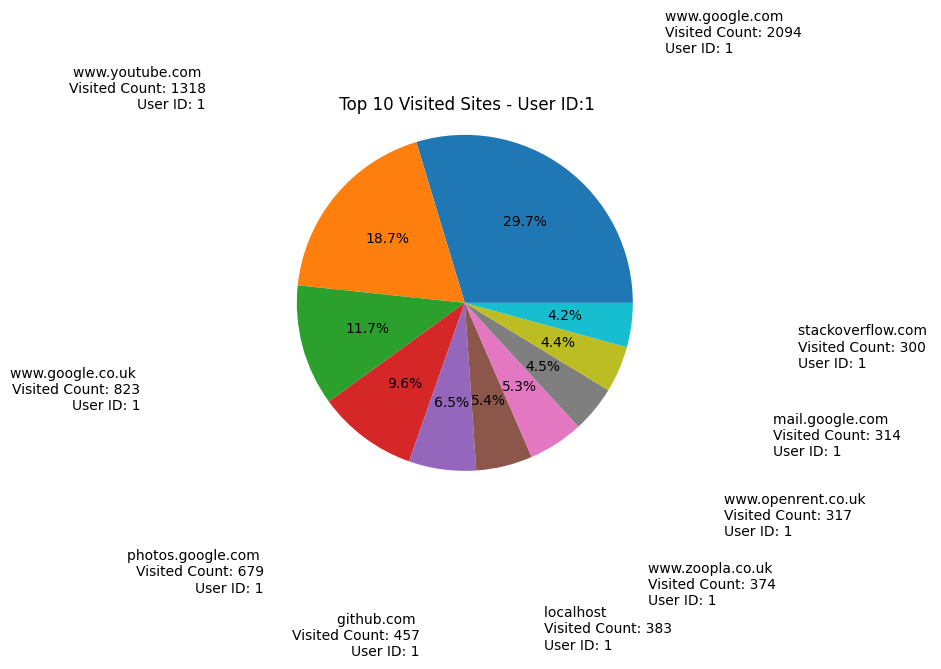

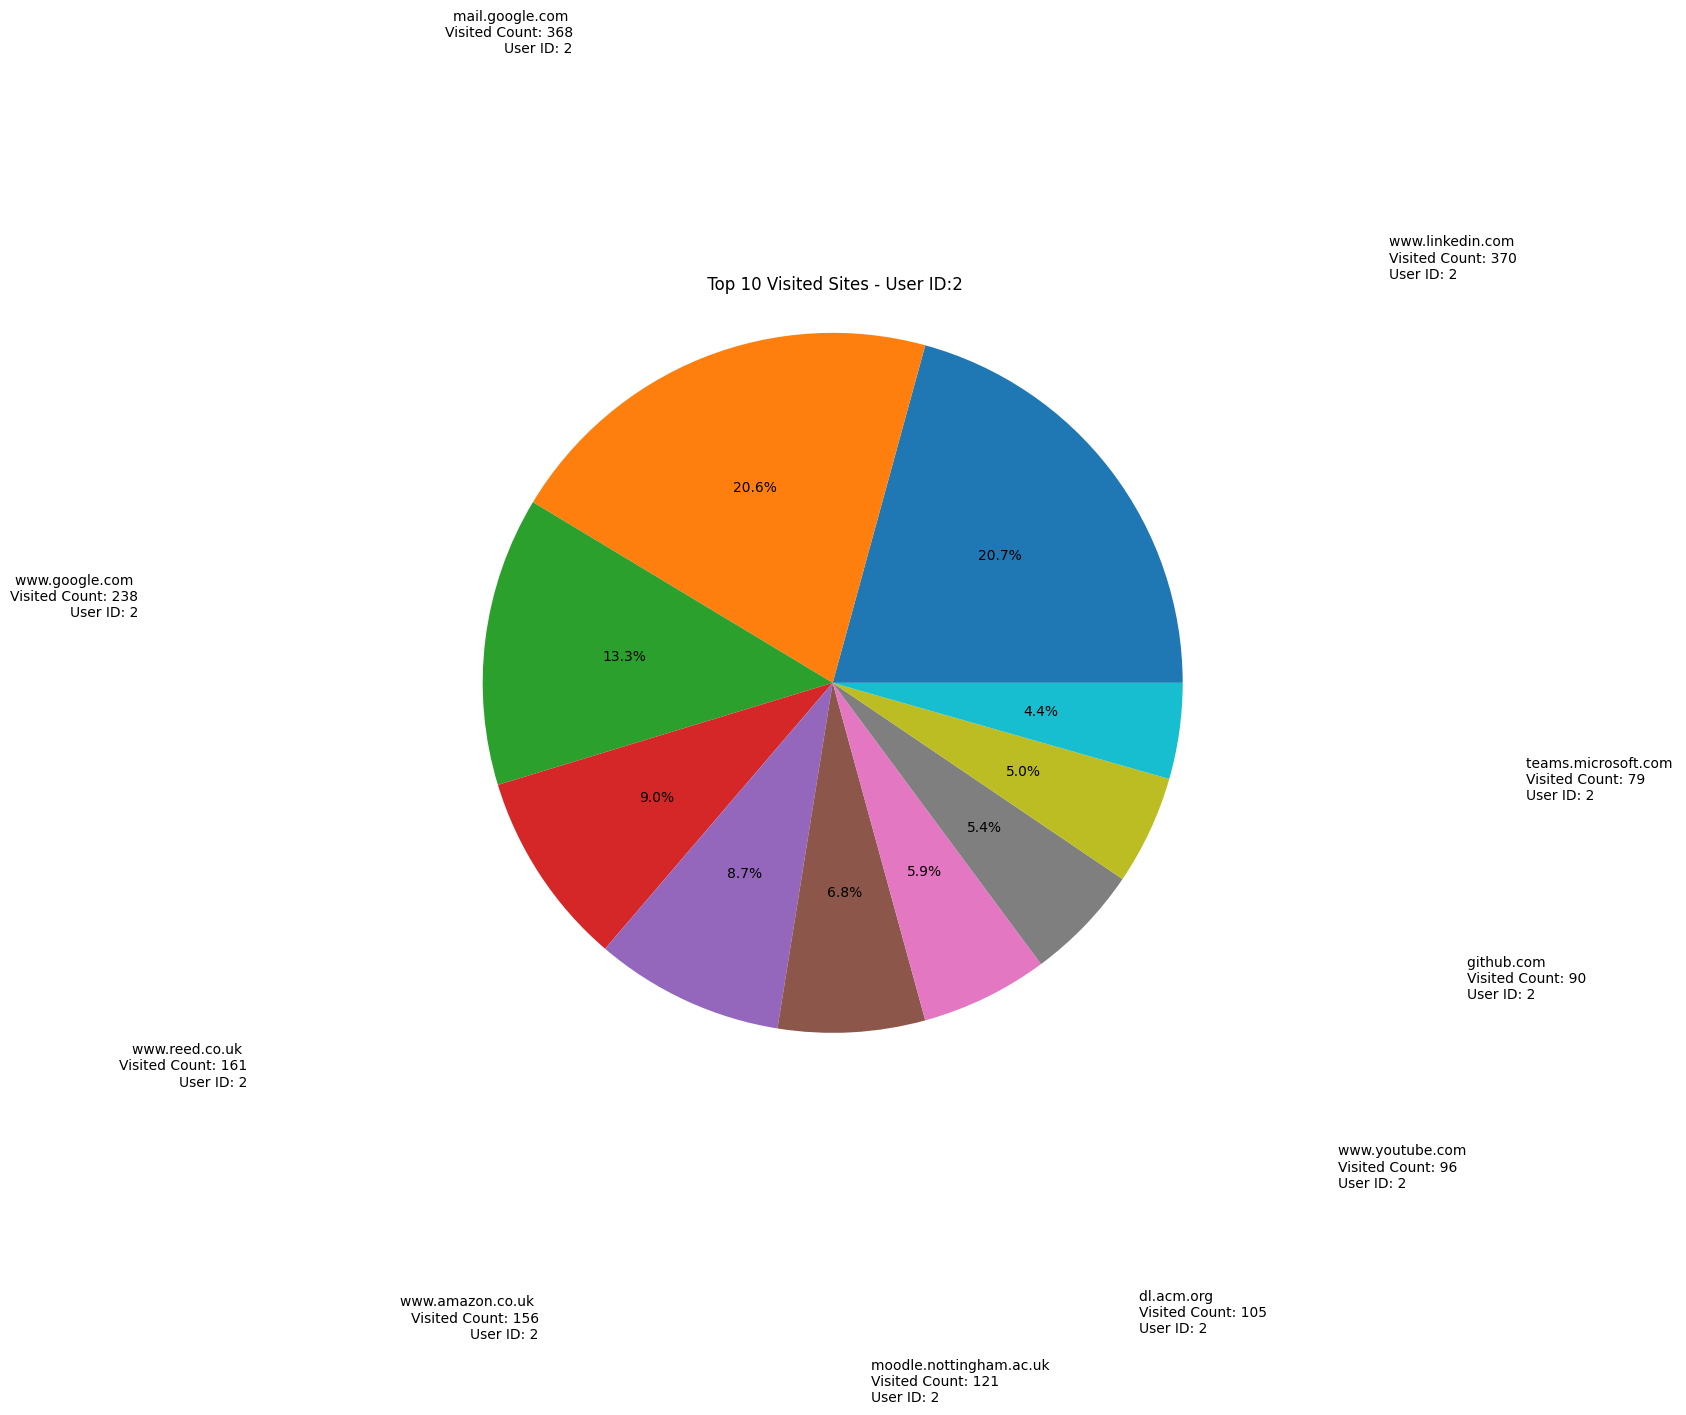

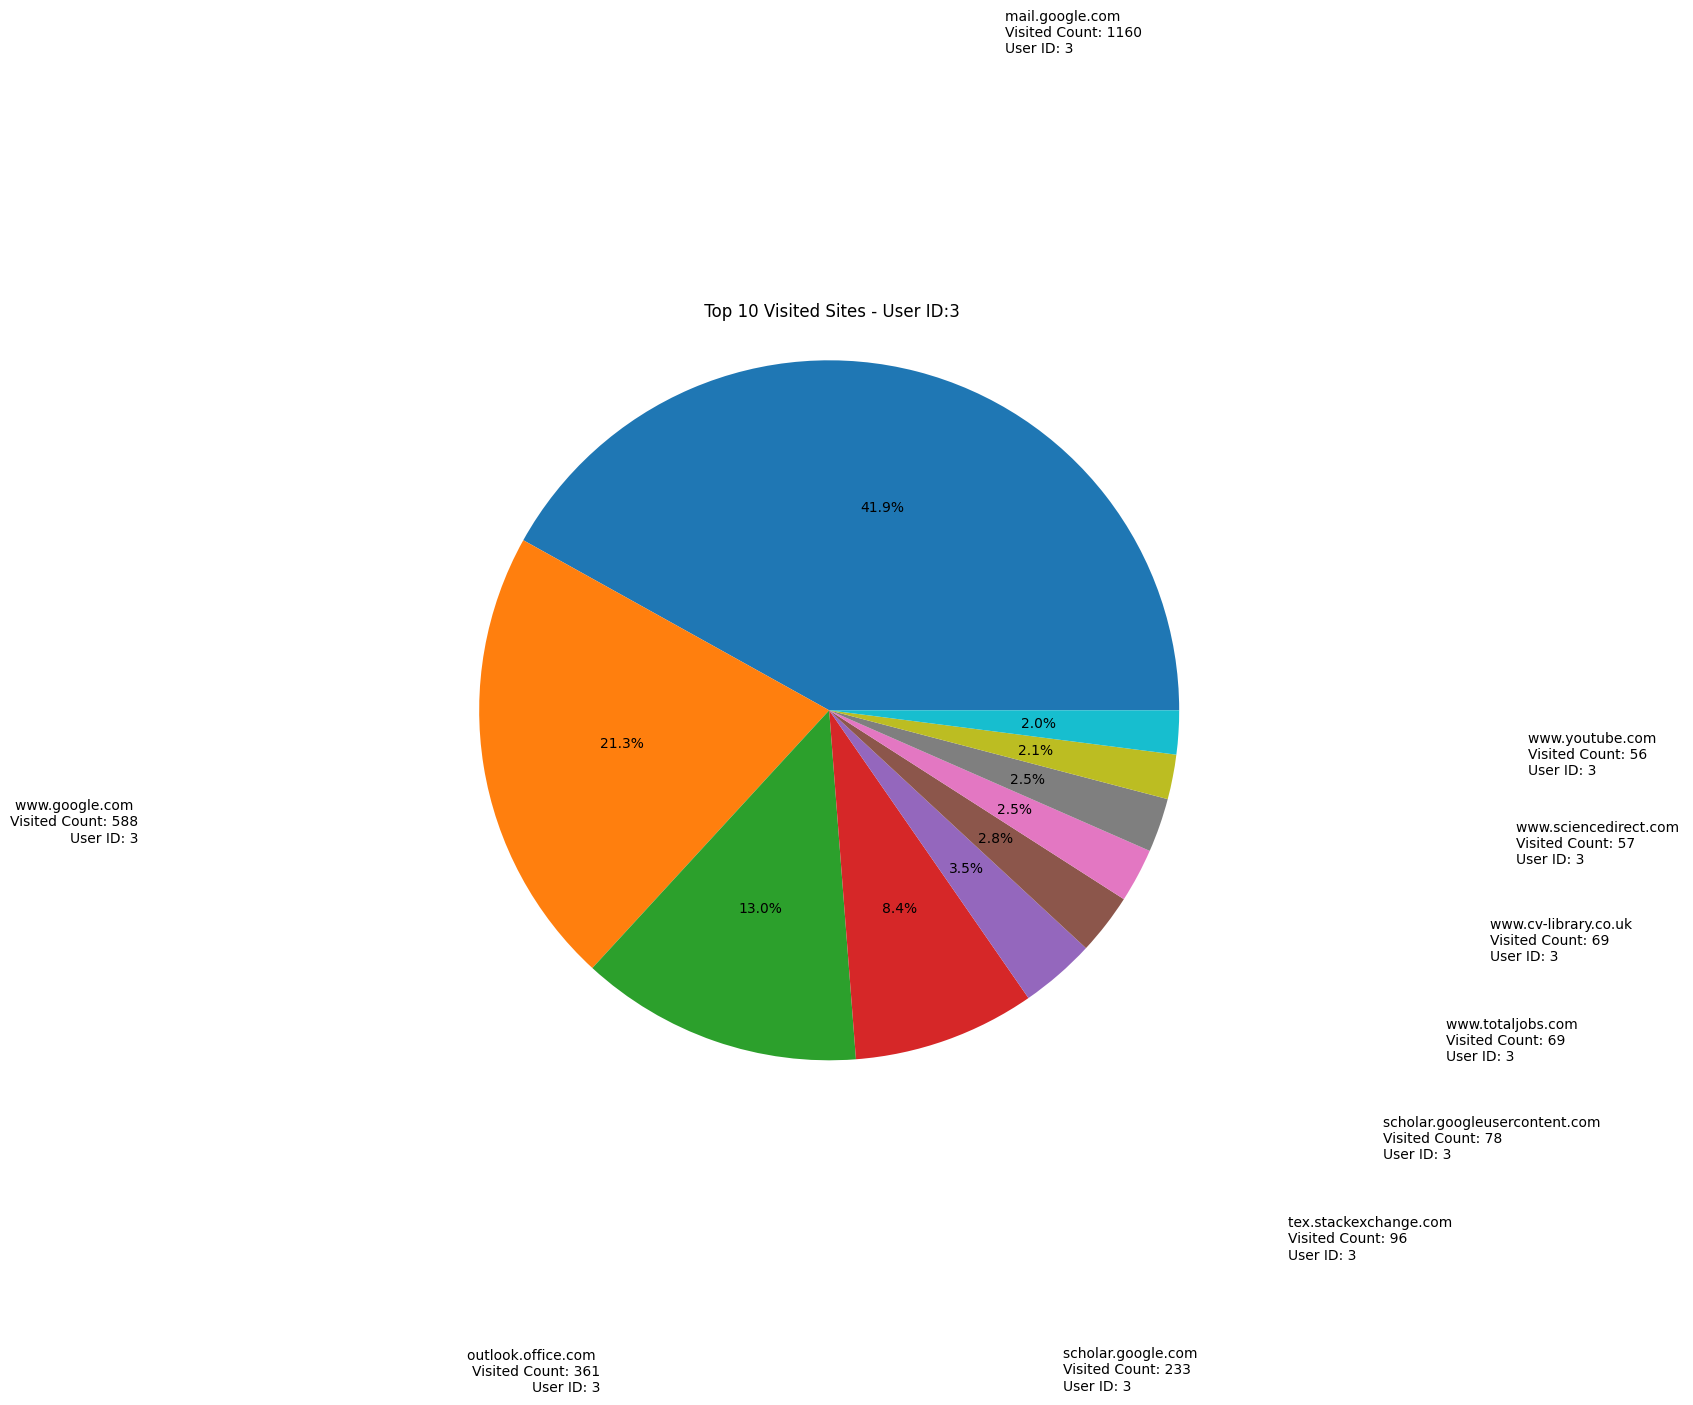

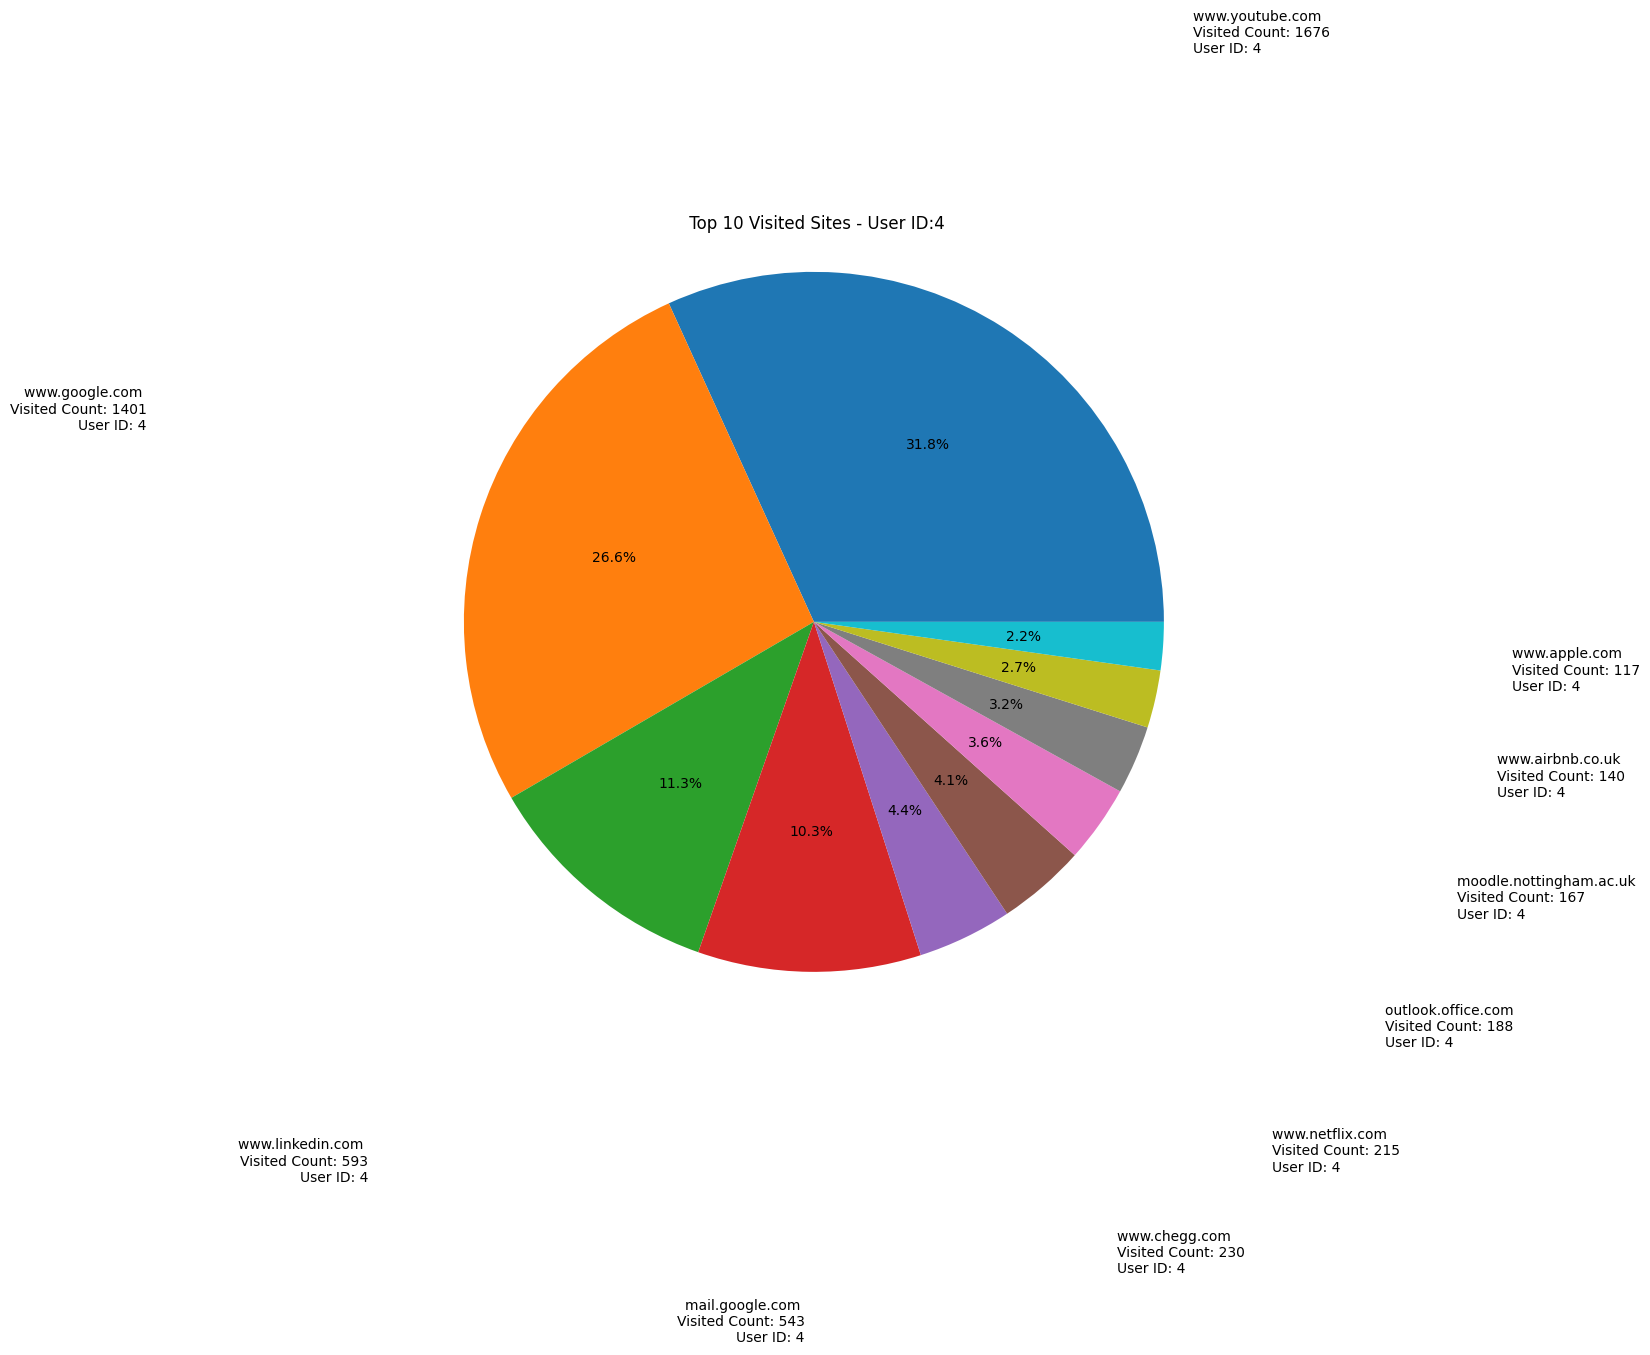

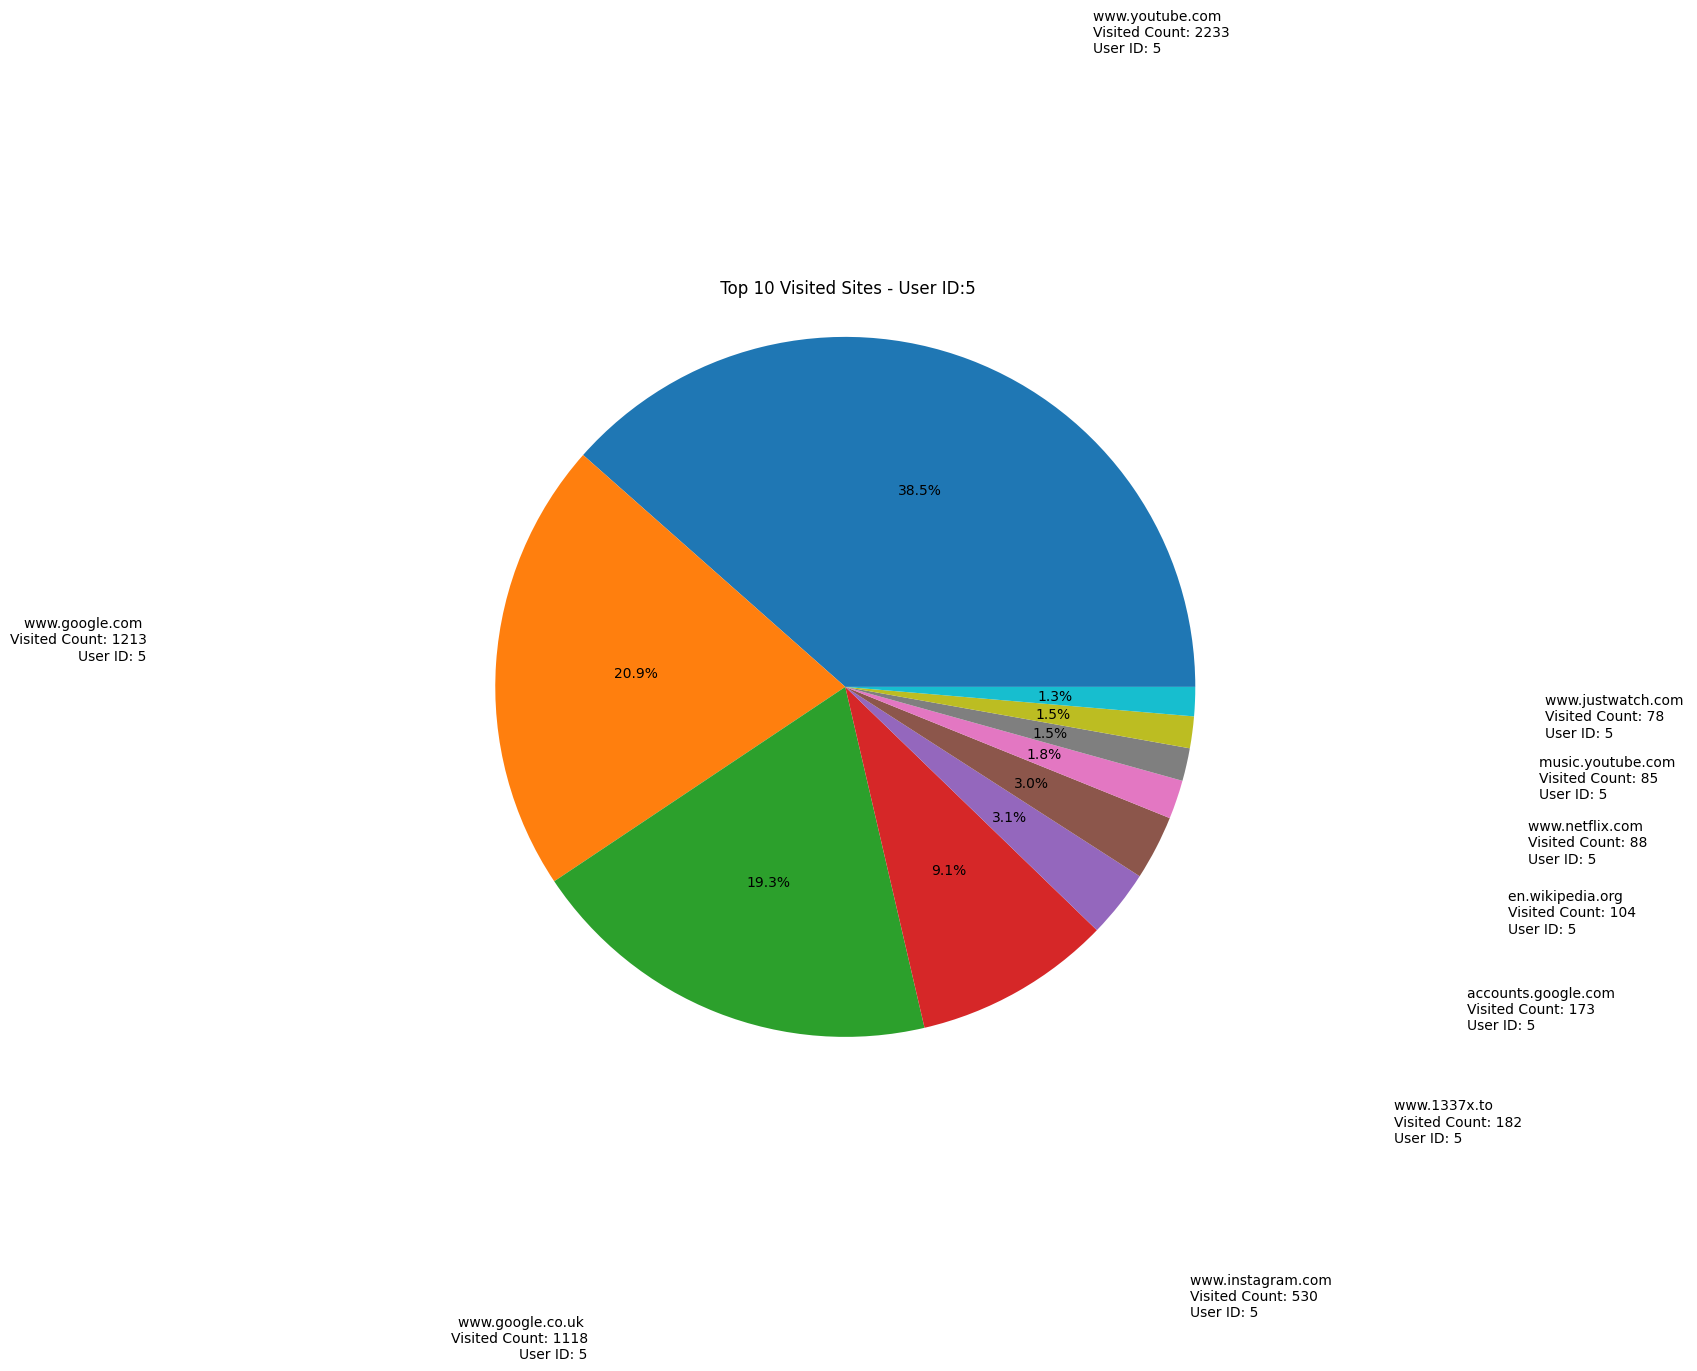

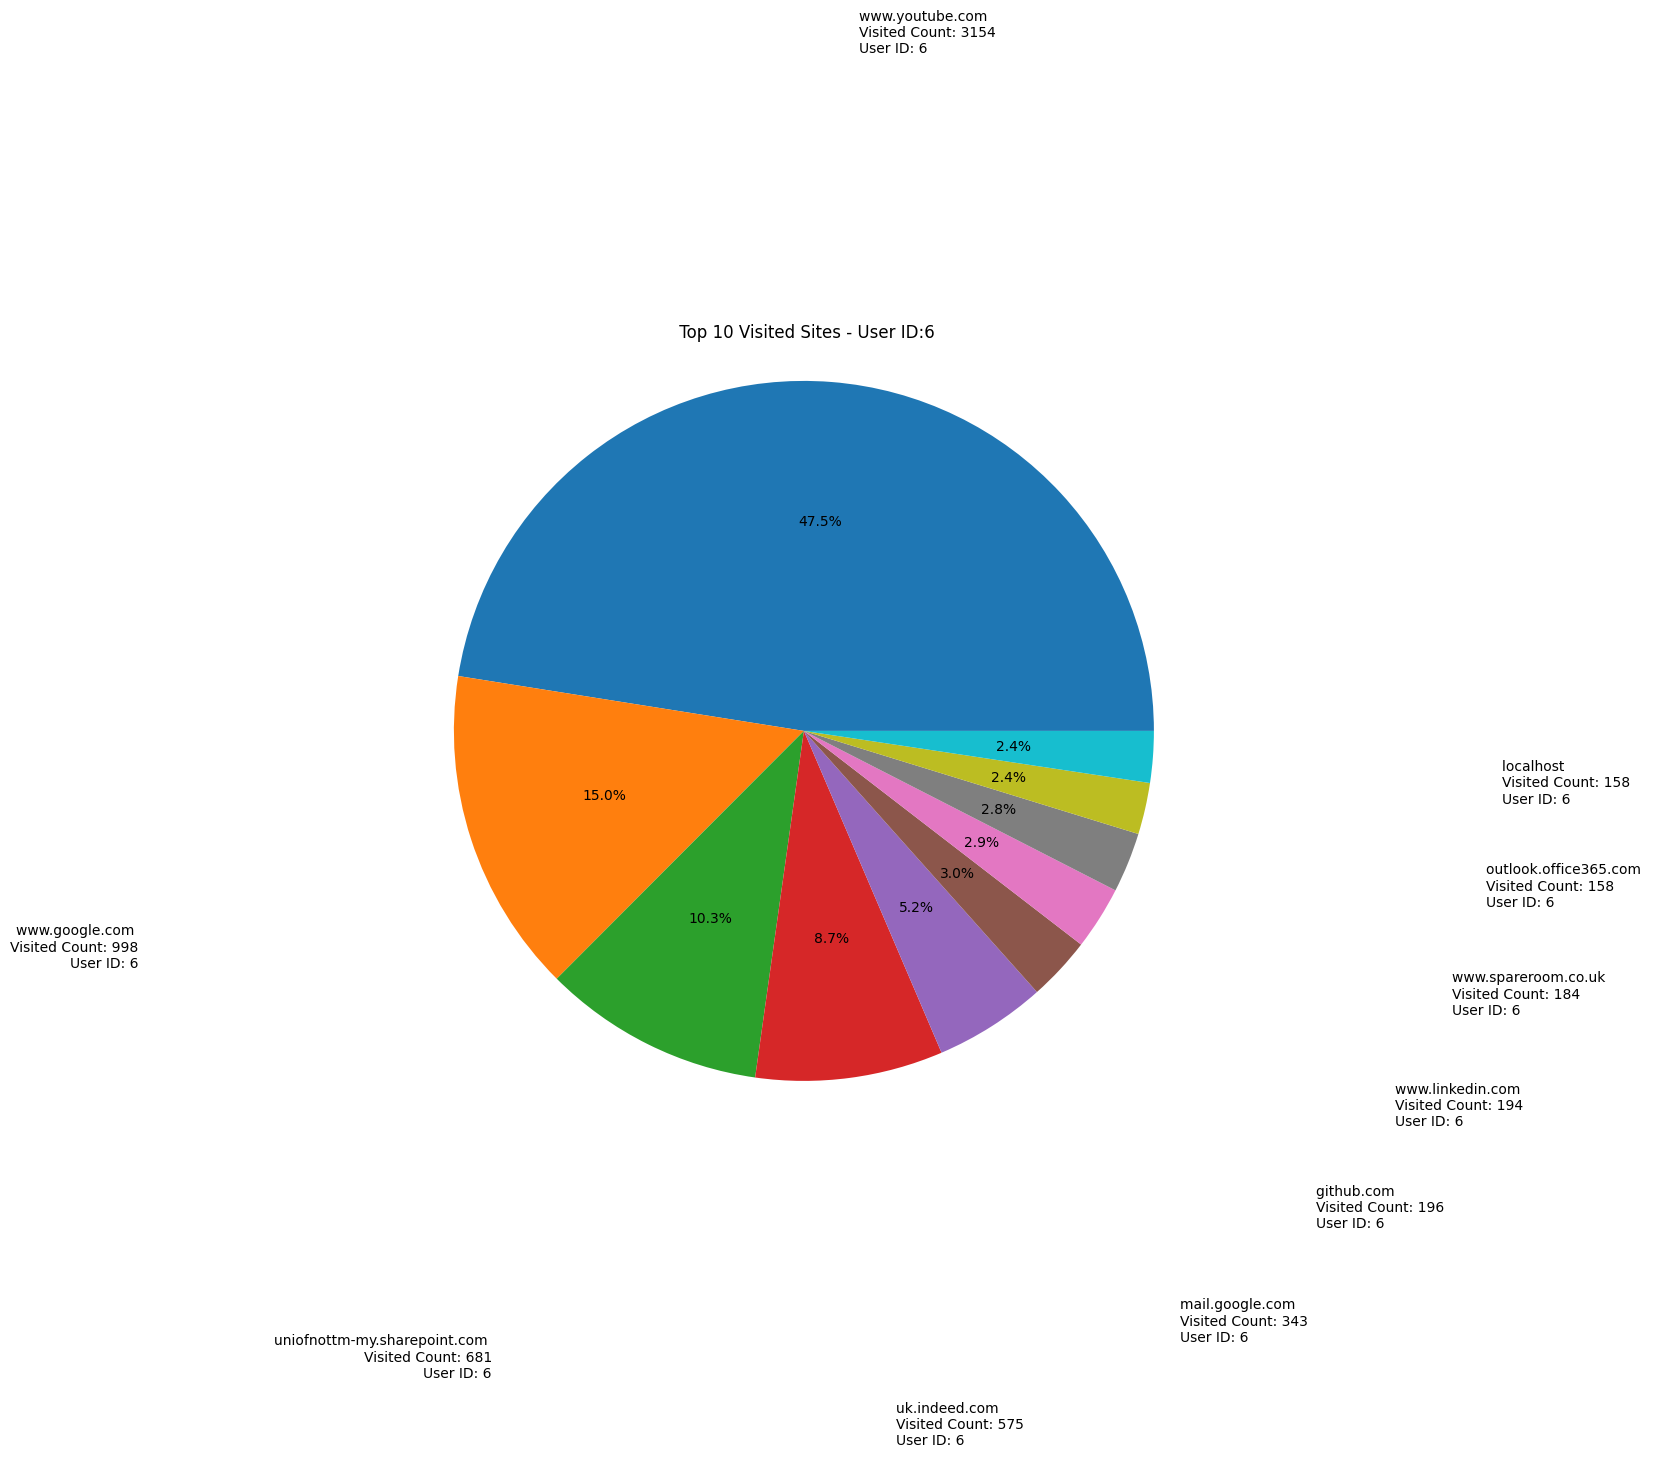

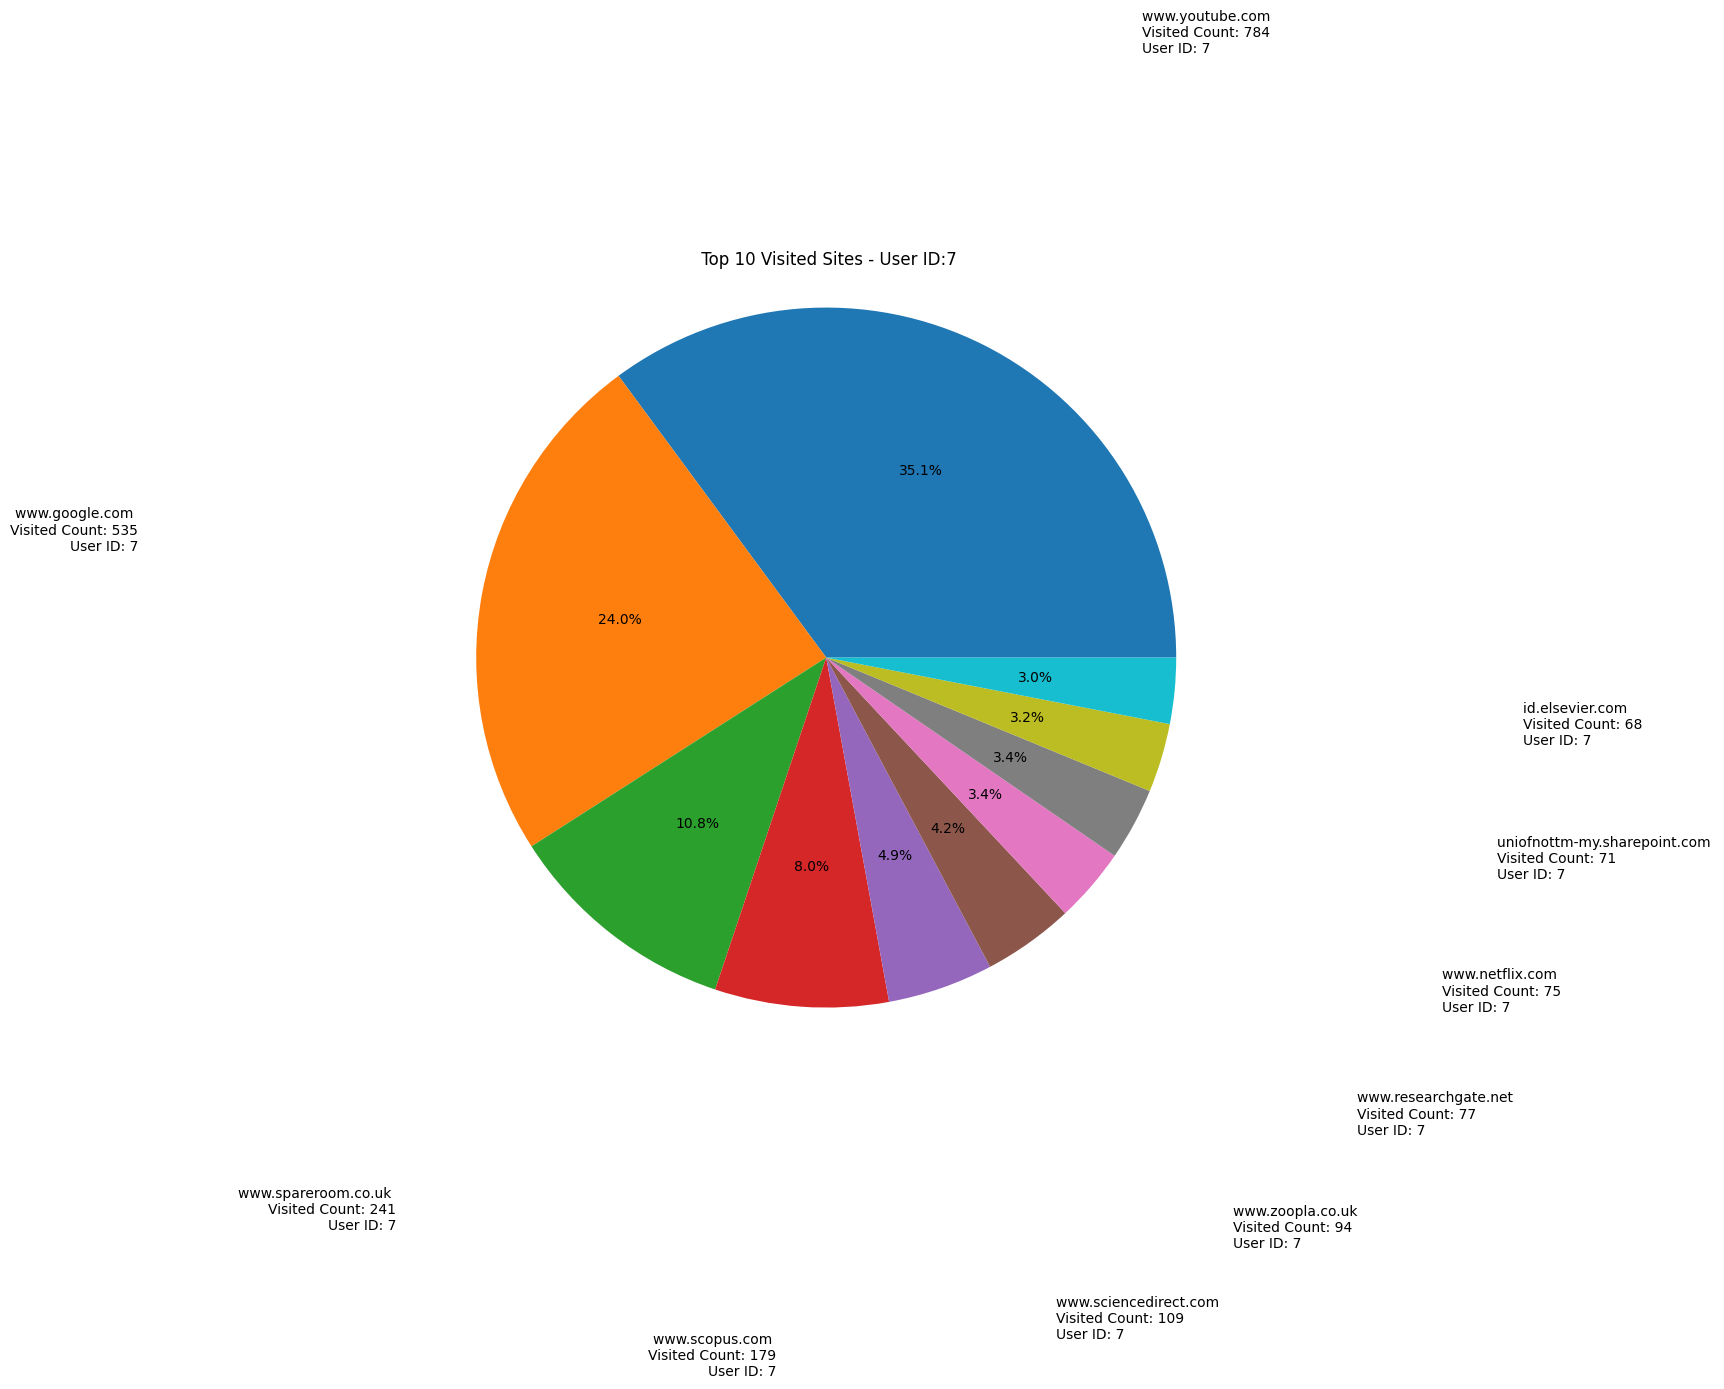

In [2]:
arr = os.listdir('./browsingdata/MostVisitedwebpagedata')
mvhistory=[]
fullhistory=[]
count=1;
usercount=0;
for i in arr:
    data = pd.read_csv("./browsingdata/MostVisitedwebpagedata/"+i)
    usercount=usercount+1
    newhis=data.values.tolist();
    for j in newhis:
        j.append(count);
        mvhistory.append(j);
    count=count+1;
newcount=count-1
userwise_history=[]
for x in range(1,newcount+1):
    userwise_history=[]
    for i in range(0,len(mvhistory)):
        if(mvhistory[i][2]==x):
            userwise_history.append(mvhistory[i])
    userwise_history=sorted(userwise_history, key=itemgetter(1),reverse=True)
    mv_site=[];
    mv_count=[];
    for i in range(0,10):
        mv_site_string=userwise_history[i][0]+" \nVisited Count: "+str(userwise_history[i][1])+"\nUser ID: "+str(userwise_history[i][2]);
        mv_site.append(mv_site_string);
        mv_count.append(userwise_history[i][1])
    y = np.array(mv_count)
    plt.pie(y, labels = mv_site,labeldistance=2.0,autopct='%1.1f%%')
    plt.axis('equal')
    plt.rcParams["figure.figsize"] = (12,10)
    plt.title(' Top 10 Visited Sites - User ID:'+str(x))
    plt.show()
# mvhistory=sorted(mvhistory, key=itemgetter(1),reverse=True)

In [3]:
monthsarr_str=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthsarr_num=['01','02','03','04','05','06','07','08','09','10','11','12']
arr = os.listdir('./browsingdata/Fullwebpagedata')
count=1
for i in arr:
    data = pd.read_csv("./browsingdata/Fullwebpagedata/"+i)
    newhis=data.values.tolist();
    for j in newhis:
        j.insert(3,count);
        x=j[2][4:15]
        y=j[2][4:7]
        str_num=monthsarr_num[monthsarr_str.index(y)]
        y=j[2][11:15]+"-"+str_num+"-"+j[2][8:10]
        j[2]=y
        fullhistory.append(j);
    count=count+1;
newupdate=[]
for x in range(1,newcount+1):
    userwise_history=[]
    for i in range(0,len(mvhistory)):
        if(mvhistory[i][2]==x):
            userwise_history.append(mvhistory[i])
    for j in range(0,len(userwise_history)):
        for i in range(0,len(fullhistory)):
            if(userwise_history[j][0] in fullhistory[i][0]):
                if(len(userwise_history[j])==3):
                    userwise_history[j].append(1);
                else:
                    c=userwise_history[j][3]
                    userwise_history[j][3]=c+1
    newupdate.append(userwise_history)

In [4]:
justdomain=[]
domainandcount=[]
for i in range(0,len(newupdate)):
    for j in range(0,len(newupdate[i])):
        justdomain.append(newupdate[i][j][0])
        domainandcount.append([newupdate[i][j][0],newupdate[i][j][1]])
commondomains=list(set(justdomain))
print('Number of domains in Total ----> '+str(len(justdomain)))
print('Number of Unique domains in Total ----> '+str(len(commondomains)))

Number of domains in Total ----> 3690
Number of Unique domains in Total ----> 2892


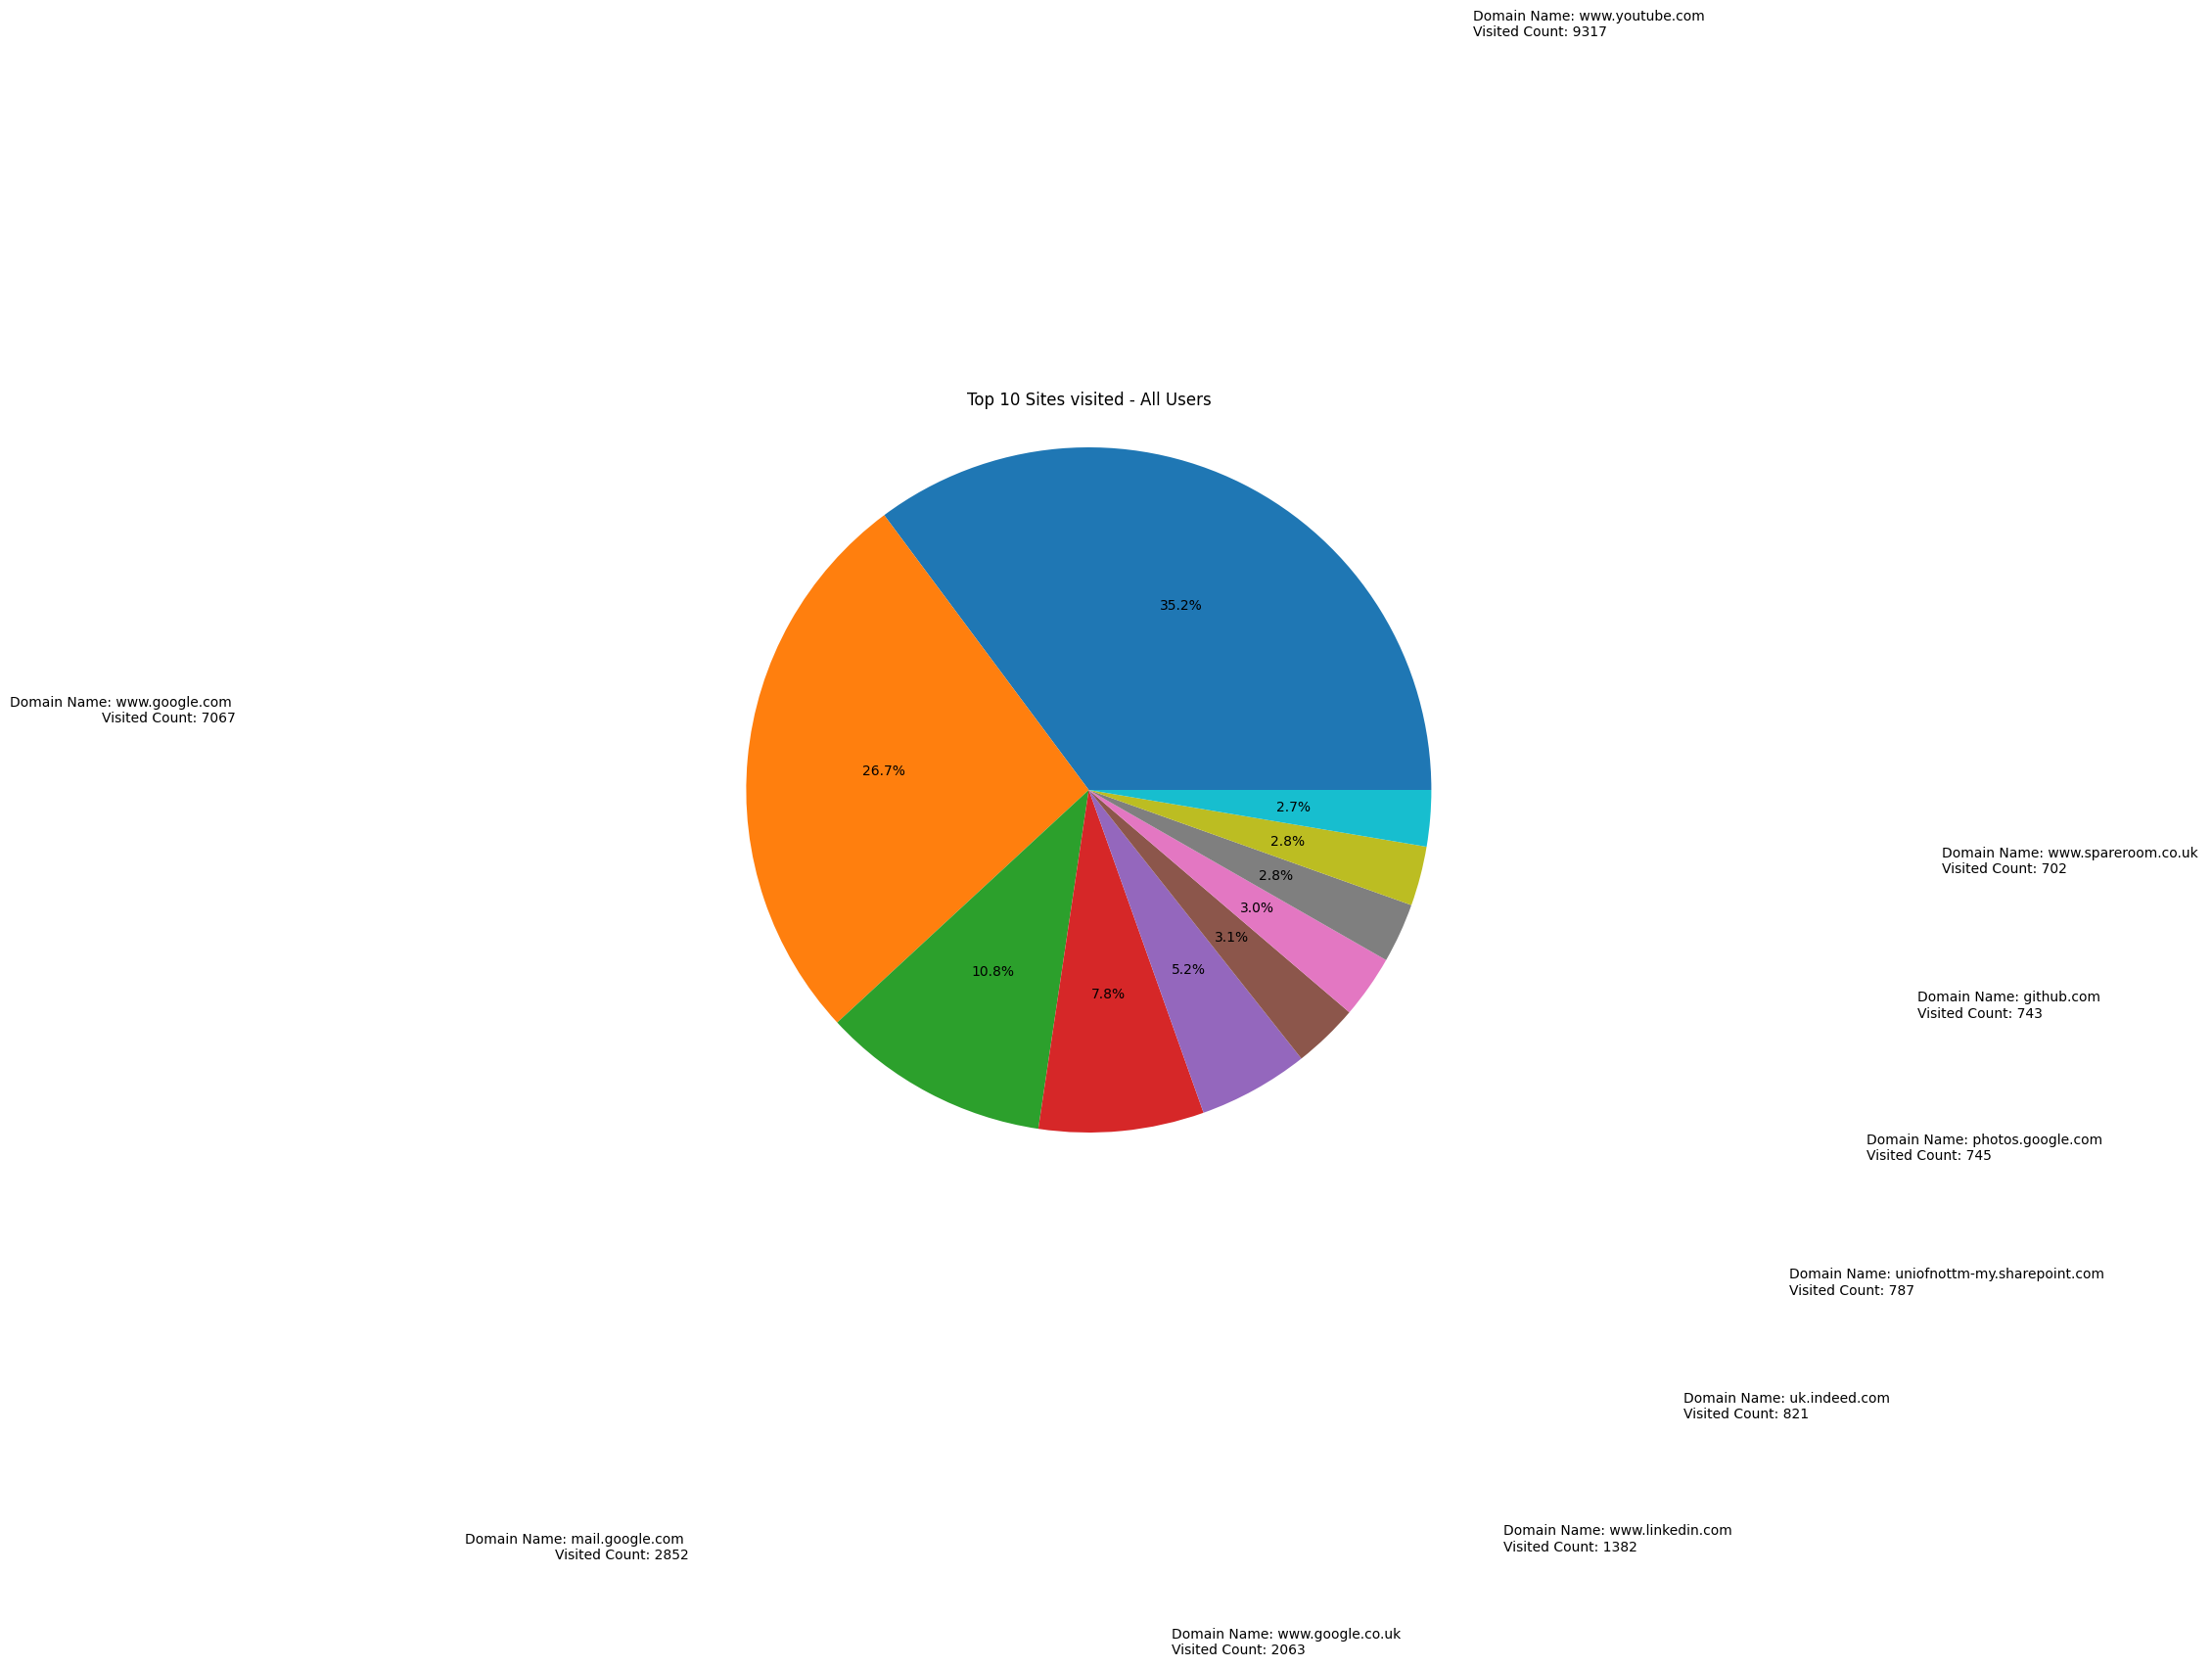

In [5]:
newmv_history=[]
newmv_domain=[]
newmv_count=[]
for i in range(0,len(commondomains)):
    ct=0
    for j in range(0,len(justdomain)):
        if(commondomains[i]==justdomain[j]):
            ct=ct+domainandcount[j][1]
    newmv_history.append([commondomains[i],ct])
    newmv_domain.append(commondomains[i])
    newmv_count.append(ct)
newmv_history=sorted(newmv_history, key=itemgetter(1),reverse=True)
mv_site=[];
mv_site1=[];
mv_count=[];
for i in range(0,10):
    mv_site_string="Domain Name: "+newmv_history[i][0]+" \nVisited Count: "+str(newmv_history[i][1]);
    mv_site.append(mv_site_string);
    mv_site1.append(newmv_history[i][0])
    mv_count.append(newmv_history[i][1])
y = np.array(mv_count)
plt.pie(y, labels = mv_site,labeldistance=2.5,autopct='%0.1f%%')
plt.axis('equal')
plt.rcParams["figure.figsize"] = (20,5)
plt.title('Top 10 Sites visited - All Users')
plt.show()

In [6]:
newsortedhistory_reverse=sorted(fullhistory, key=itemgetter(2),reverse=True)
newsortedhistory=sorted(fullhistory, key=itemgetter(2))
startdate=newsortedhistory[0][2]
enddate=newsortedhistory_reverse[0][2]
print(startdate)
print(enddate)

2022-06-22
2022-09-21


In [7]:
dates_list = pd.date_range(start=startdate, end=enddate)
df = pd.DataFrame(dates_list, columns=["Dates"])
df
date_array=df.values;
new_date_array=[]
for i in range(0,len(date_array)):
    x=str(date_array[i])
    x=x[2:12]
    new_date_array.append(str(x))
    date_array[i]=str(x)
print(new_date_array)

['2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13', '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31', '2022

In [8]:
sites_datewise=[]
ex_array=[]
for i in range(0,len(mv_site1)):
    ex_array=[]
    ex_array.append(mv_site1[i])
    for i in range(0,len(new_date_array)):
        ex_array.append(0)
    sites_datewise.append(ex_array)
print(sites_datewise)

[['www.youtube.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['www.google.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['mail.google.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['www.google.co.uk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
for i in range(0,len(sites_datewise)):
    for j in range(0,len(newsortedhistory)):
        if sites_datewise[i][0] in newsortedhistory[j][0]:
            ids=new_date_array.index(newsortedhistory[j][2])
            val1=sites_datewise[i][ids+1]
            sites_datewise[i][ids+1]=val1+1
print(sites_datewise)

[['www.youtube.com', 2, 65, 113, 71, 17, 57, 2, 46, 6, 17, 32, 102, 47, 68, 31, 24, 164, 113, 57, 63, 23, 68, 74, 181, 133, 59, 54, 29, 42, 64, 127, 56, 53, 126, 79, 102, 213, 133, 82, 53, 65, 46, 65, 167, 133, 179, 166, 155, 69, 117, 122, 163, 163, 24, 77, 187, 177, 109, 133, 33, 63, 76, 109, 238, 313, 184, 182, 39, 55, 48, 23, 29, 26, 128, 61, 96, 78, 117, 196, 167, 92, 320, 95, 244, 82, 402, 259, 127, 147, 141, 49, 32], ['www.google.com', 4, 40, 15, 3, 0, 20, 9, 64, 14, 21, 9, 5, 43, 56, 66, 34, 118, 51, 44, 53, 14, 56, 101, 86, 23, 20, 11, 61, 185, 75, 118, 7, 20, 68, 57, 109, 77, 28, 14, 21, 182, 67, 69, 126, 69, 105, 59, 370, 50, 163, 161, 159, 83, 34, 65, 147, 119, 197, 132, 141, 122, 100, 135, 269, 174, 84, 45, 60, 23, 27, 63, 14, 9, 27, 33, 274, 83, 196, 128, 82, 20, 125, 53, 118, 38, 196, 102, 60, 98, 18, 26, 6], ['mail.google.com', 3, 4, 9, 16, 11, 0, 7, 117, 9, 53, 67, 7, 35, 29, 77, 17, 25, 31, 40, 12, 7, 64, 49, 48, 9, 15, 4, 90, 33, 84, 74, 5, 0, 32, 53, 35, 14, 103, 11,

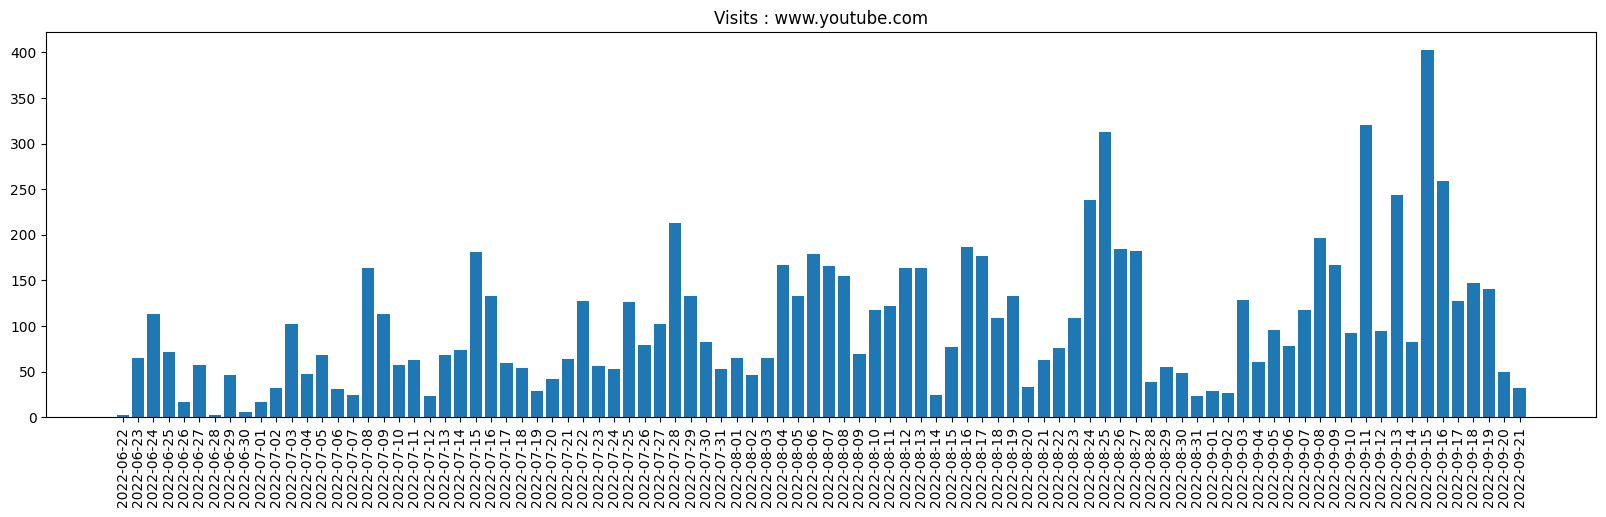

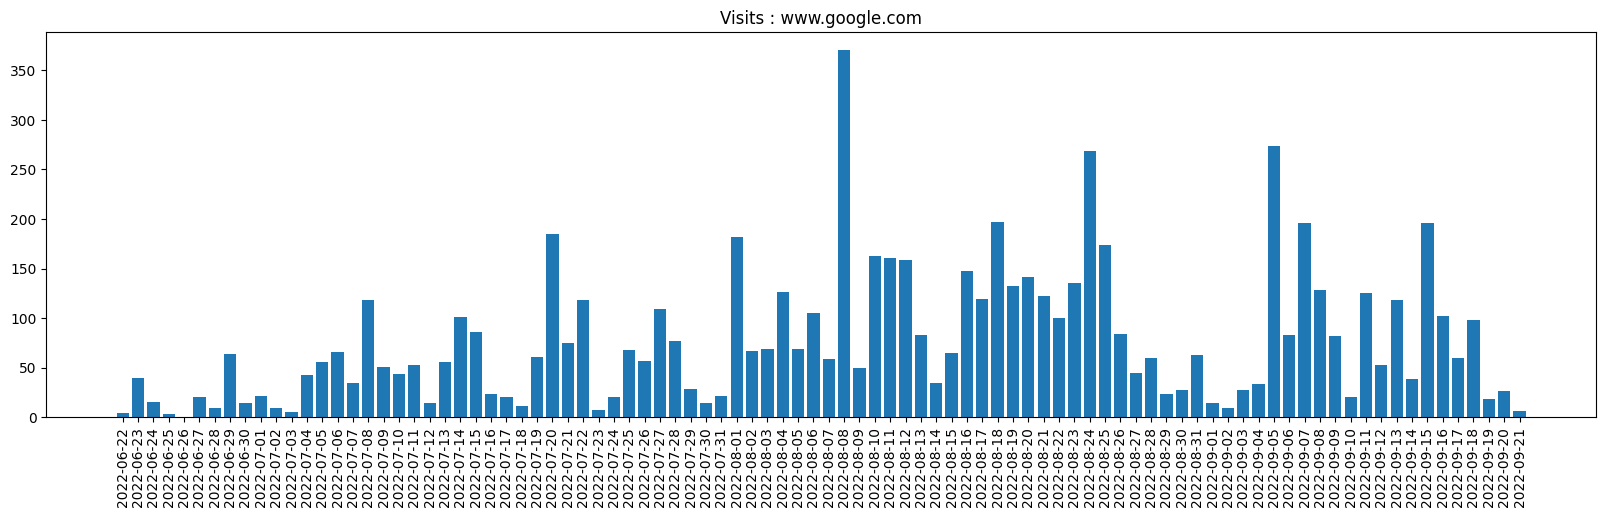

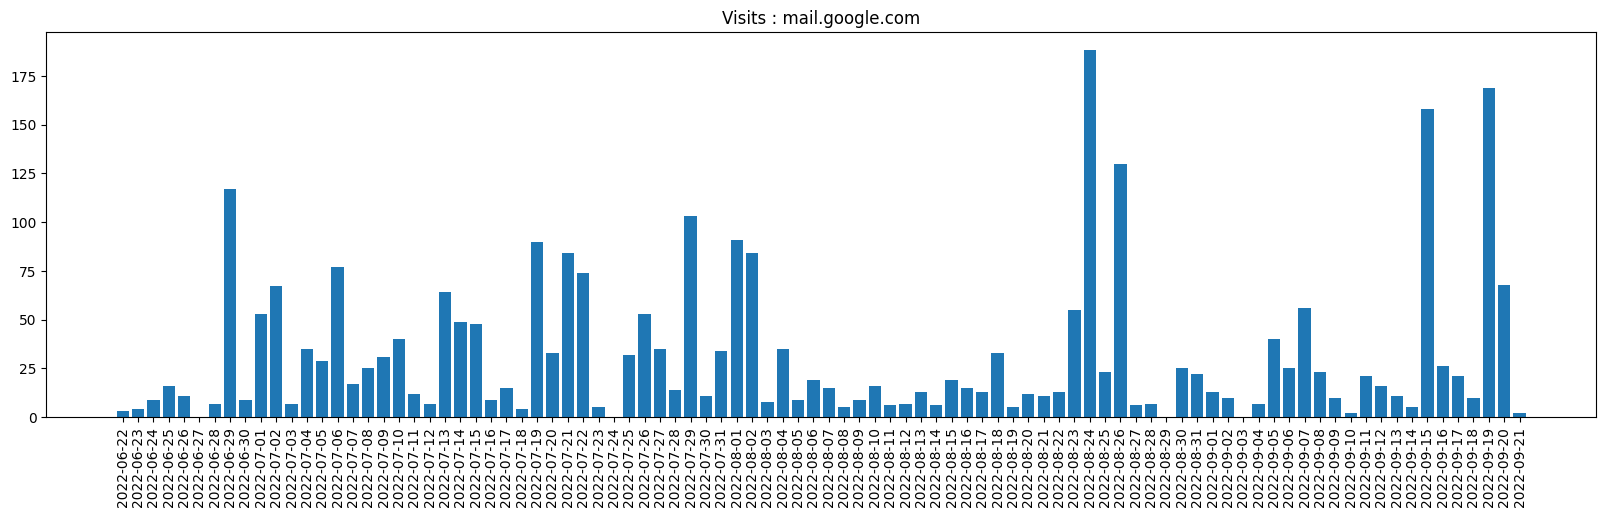

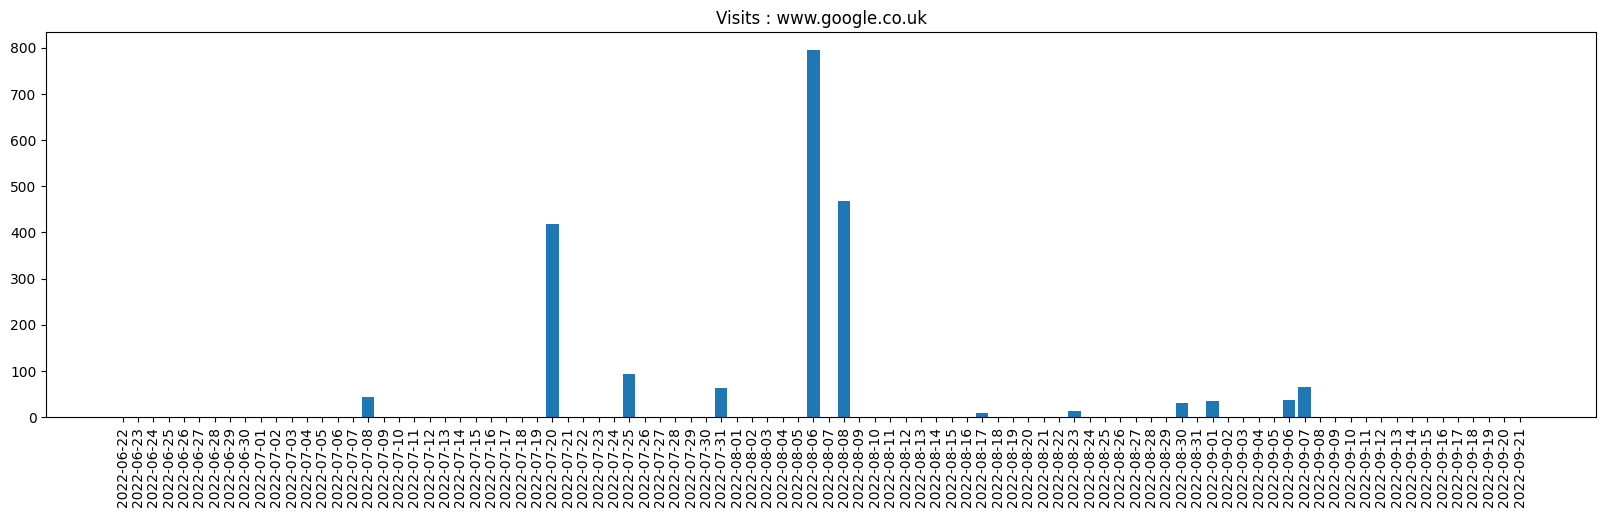

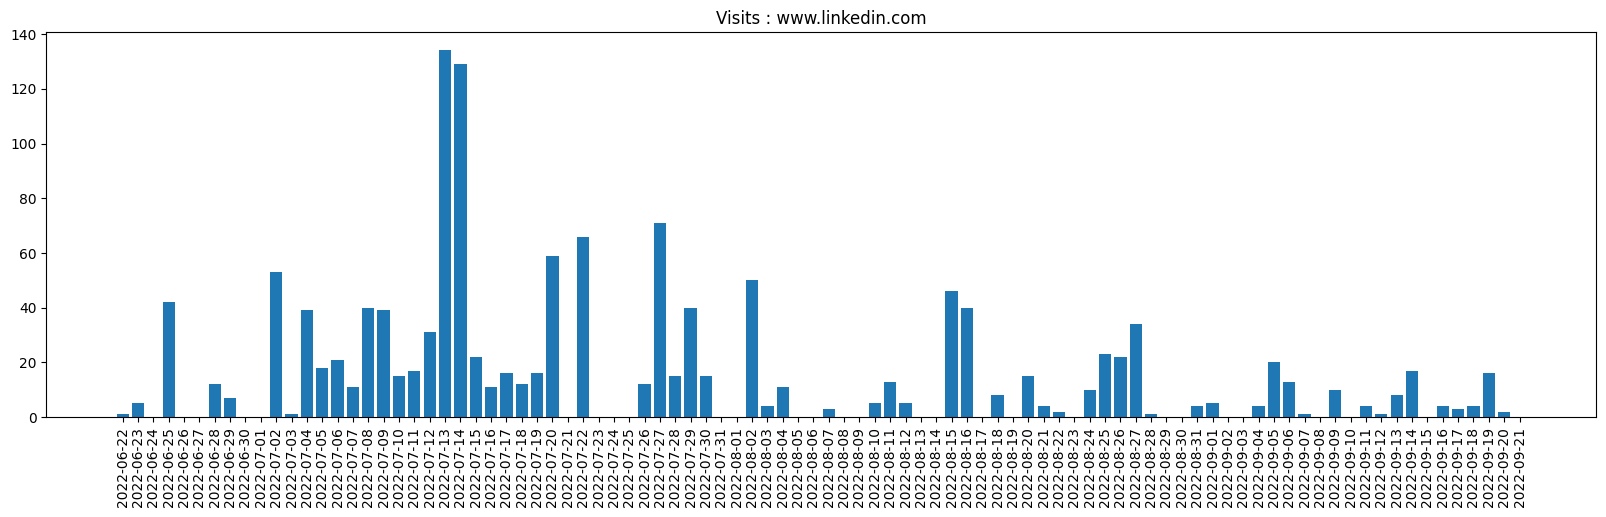

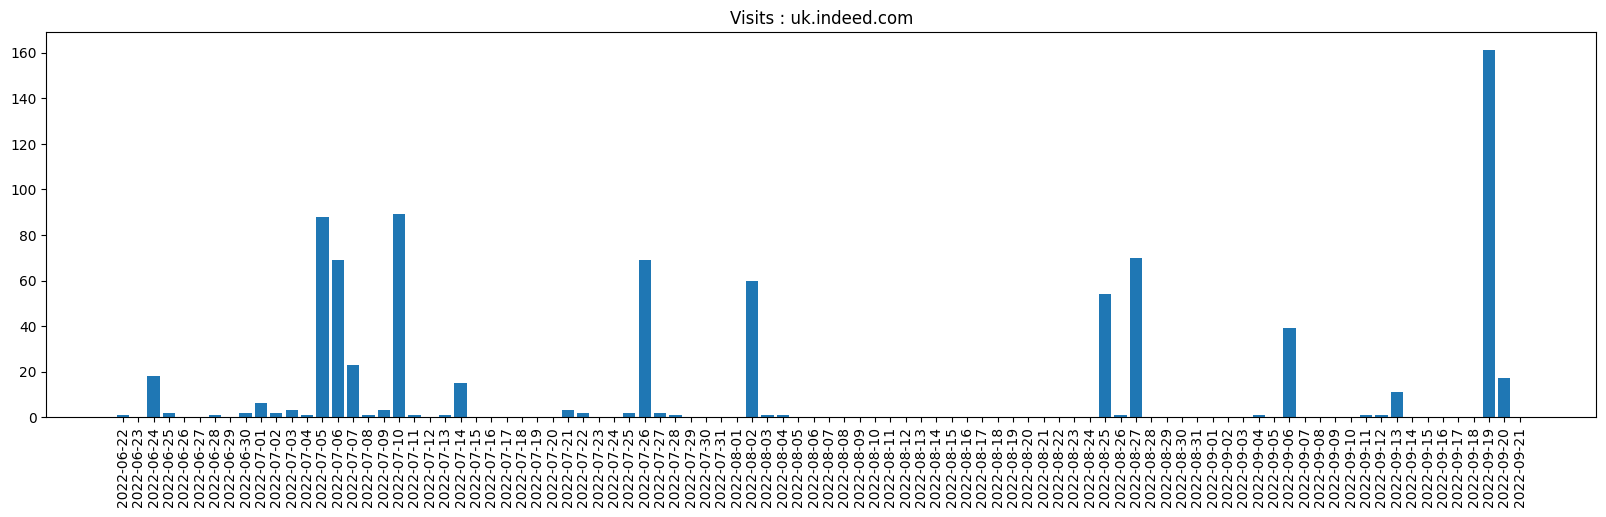

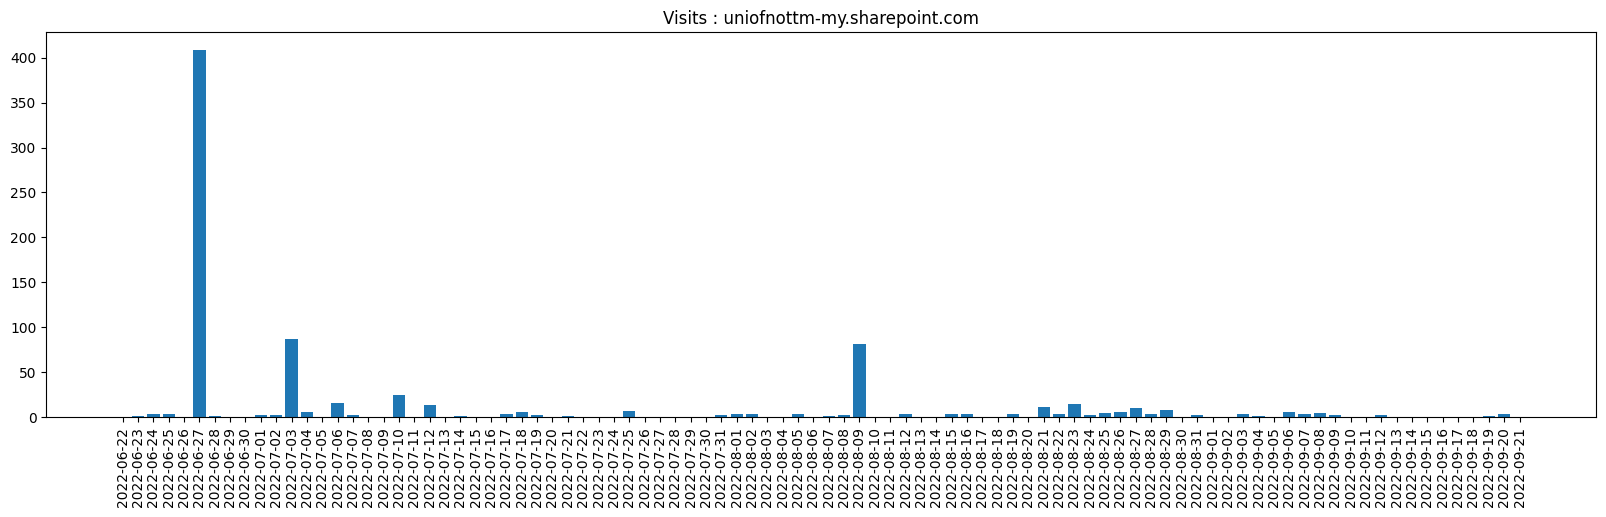

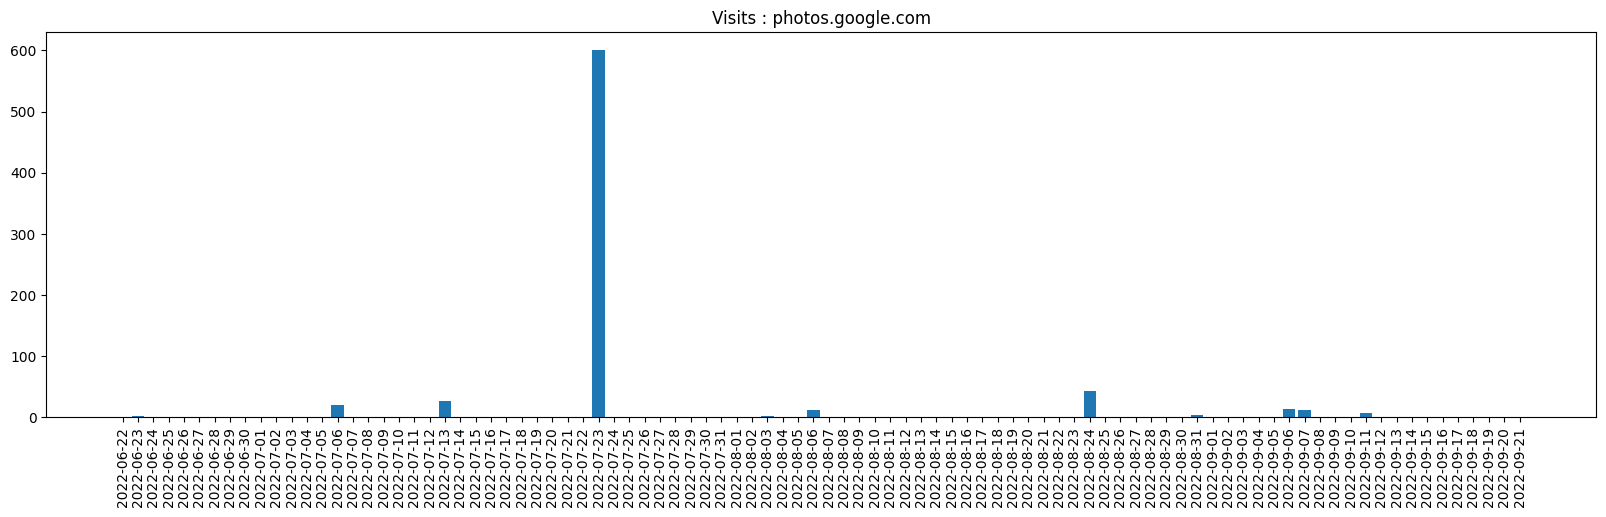

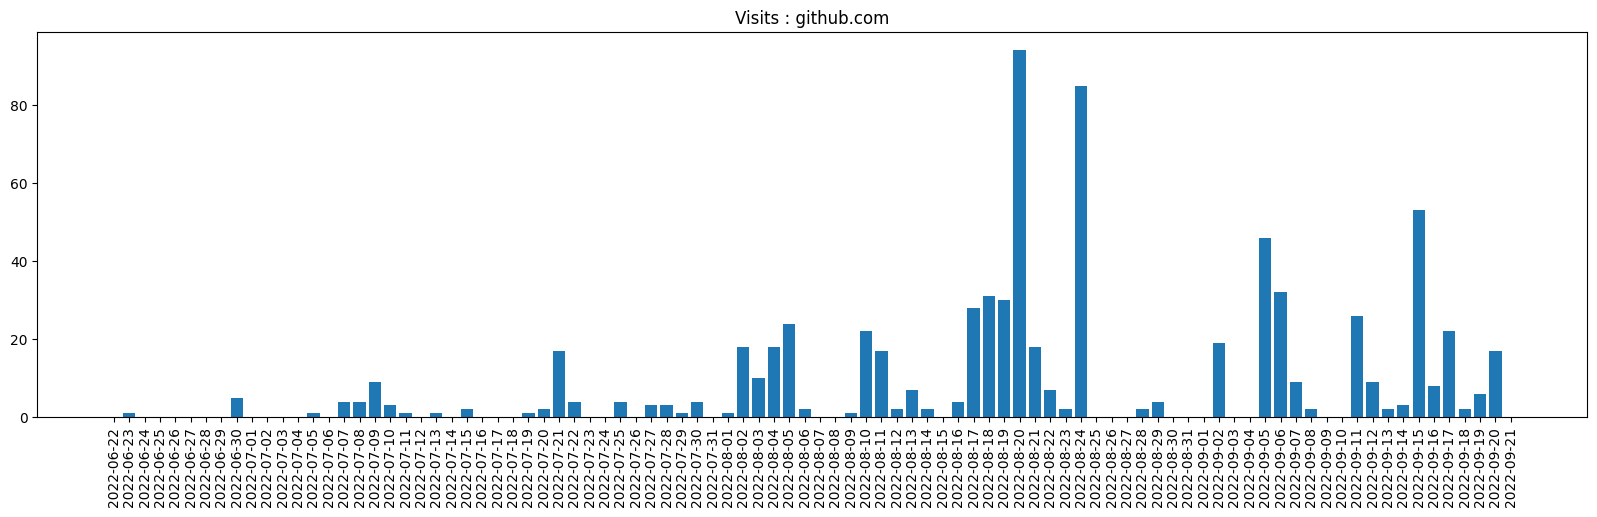

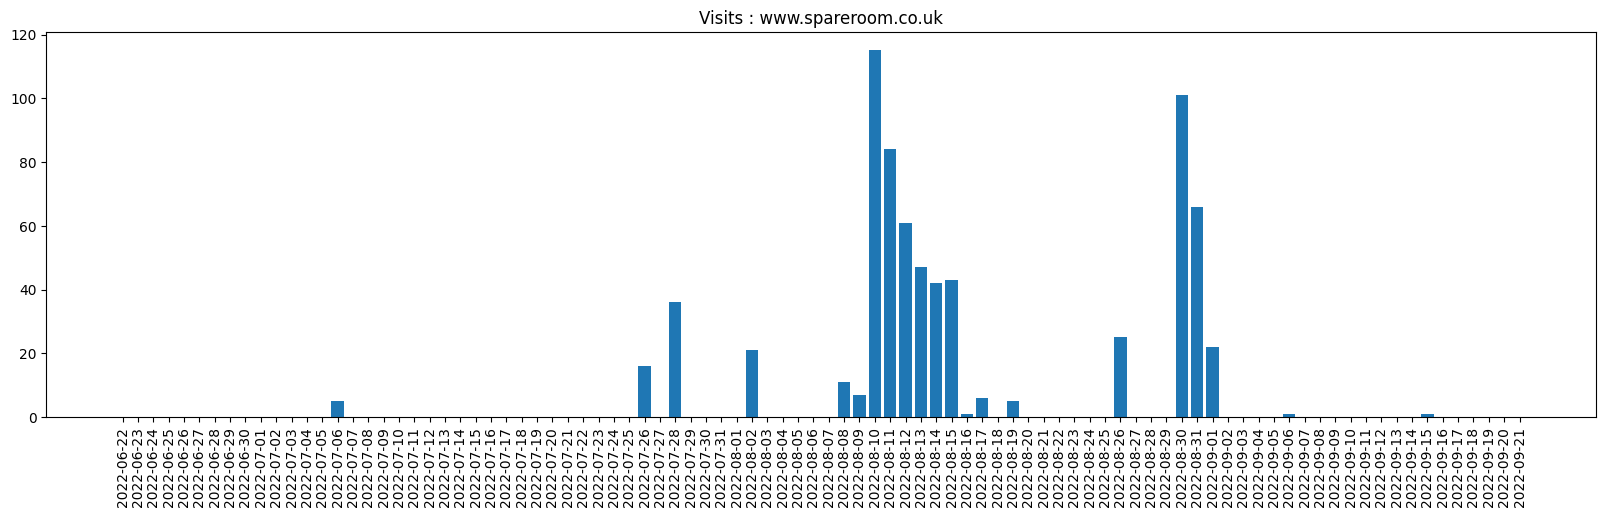

In [10]:
for i in range(0,len(sites_datewise)):
    ne=sites_datewise[i][1:len(sites_datewise[i])]
    ypoints = np.array(ne)
    plt.bar(new_date_array,ypoints)
    plt.xticks(rotation='vertical')
    plt.title('Visits : '+sites_datewise[i][0])
    plt.rcParams["figure.figsize"] = (20,5)
    plt.show()

In [11]:
sites1_datewise=[]
ex_array=[]
for i in range(0,len(mv_site1)):
    ex_array=[]
    ex_array.append(mv_site1[i])
    for i in range(0,len(monthsarr_num)):
        ex_array.append(0)
    ex_array.append(0)
    sites1_datewise.append(ex_array)
print(sites1_datewise)

[['www.youtube.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['www.google.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['mail.google.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['www.google.co.uk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['www.linkedin.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['uk.indeed.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['uniofnottm-my.sharepoint.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['photos.google.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['github.com', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ['www.spareroom.co.uk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [12]:
for i in range(0,len(sites1_datewise)):
    for j in range(0,len(newsortedhistory)):
        if sites1_datewise[i][0] in newsortedhistory[j][0]:
            ids=monthsarr_num.index(newsortedhistory[j][2][5:7])
            val1=sites1_datewise[i][ids+1]
            sites1_datewise[i][ids+1]=val1+1
            sites1_datewise[i][13]=(sites1_datewise[i][13]+newsortedhistory[j][4])/2
            g = float("{:.2f}".format(sites1_datewise[i][13]))
            sites1_datewise[i][13]=g
print(sites1_datewise)
time1=[]
time1_site=[]
for i in range(0,len(sites1_datewise)):
    time1_site.append(sites1_datewise[i][0])
    time1.append(sites1_datewise[i][13])
print(time1)
print(time1_site)

[['www.youtube.com', 0, 0, 0, 0, 0, 379, 2469, 3680, 2888, 0, 0, 0, 2.06], ['www.google.com', 0, 0, 0, 0, 0, 169, 1651, 3600, 1706, 0, 0, 0, 3.36], ['mail.google.com', 0, 0, 0, 0, 0, 176, 1157, 900, 693, 0, 0, 0, 2.17], ['www.google.co.uk', 0, 0, 0, 0, 0, 1, 619, 1317, 138, 0, 0, 0, 2.85], ['www.linkedin.com', 0, 0, 0, 0, 0, 67, 903, 300, 112, 0, 0, 0, 2.47], ['uk.indeed.com', 0, 0, 0, 0, 0, 24, 381, 187, 231, 0, 0, 0, 3.42], ['uniofnottm-my.sharepoint.com', 0, 0, 0, 0, 0, 418, 177, 176, 28, 0, 0, 0, 2.12], ['photos.google.com', 0, 0, 0, 0, 0, 2, 650, 62, 31, 0, 0, 0, 2.67], ['github.com', 0, 0, 0, 0, 0, 6, 64, 429, 256, 0, 0, 0, 3.82], ['www.spareroom.co.uk', 0, 0, 0, 0, 0, 0, 57, 635, 24, 0, 0, 0, 1.97]]
[2.06, 3.36, 2.17, 2.85, 2.47, 3.42, 2.12, 2.67, 3.82, 1.97]
['www.youtube.com', 'www.google.com', 'mail.google.com', 'www.google.co.uk', 'www.linkedin.com', 'uk.indeed.com', 'uniofnottm-my.sharepoint.com', 'photos.google.com', 'github.com', 'www.spareroom.co.uk']


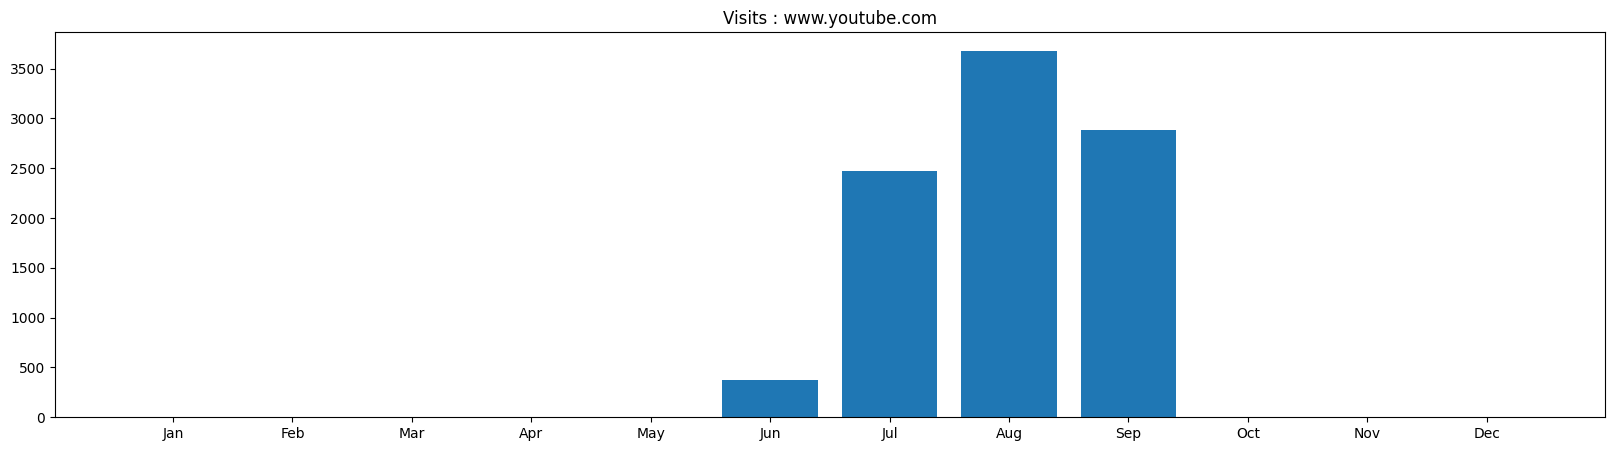

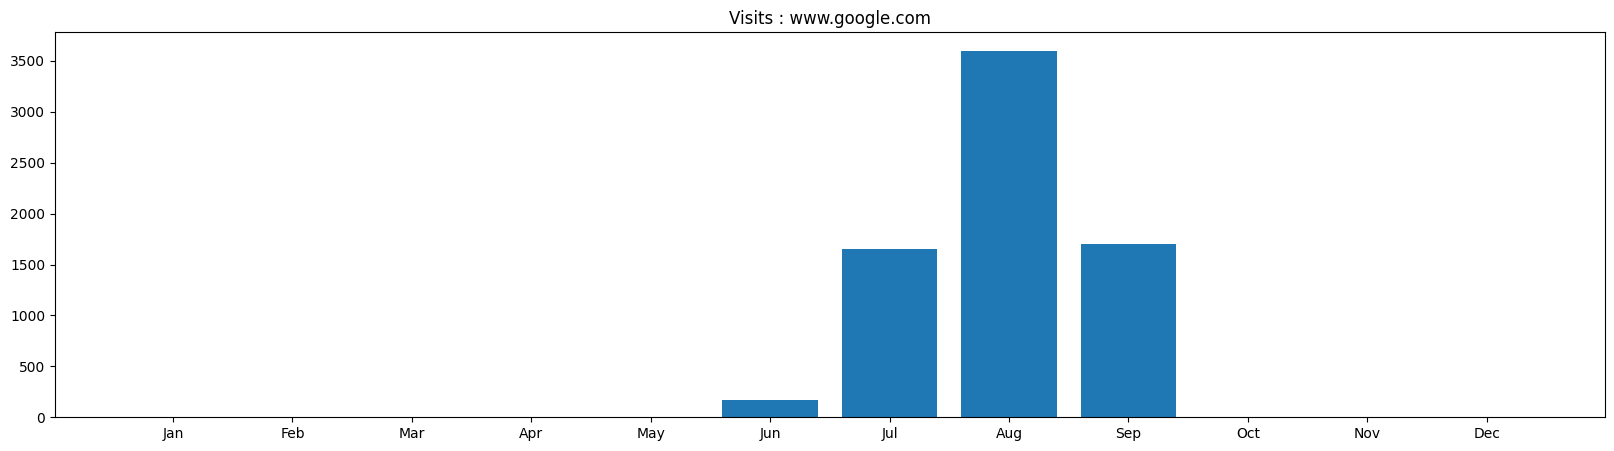

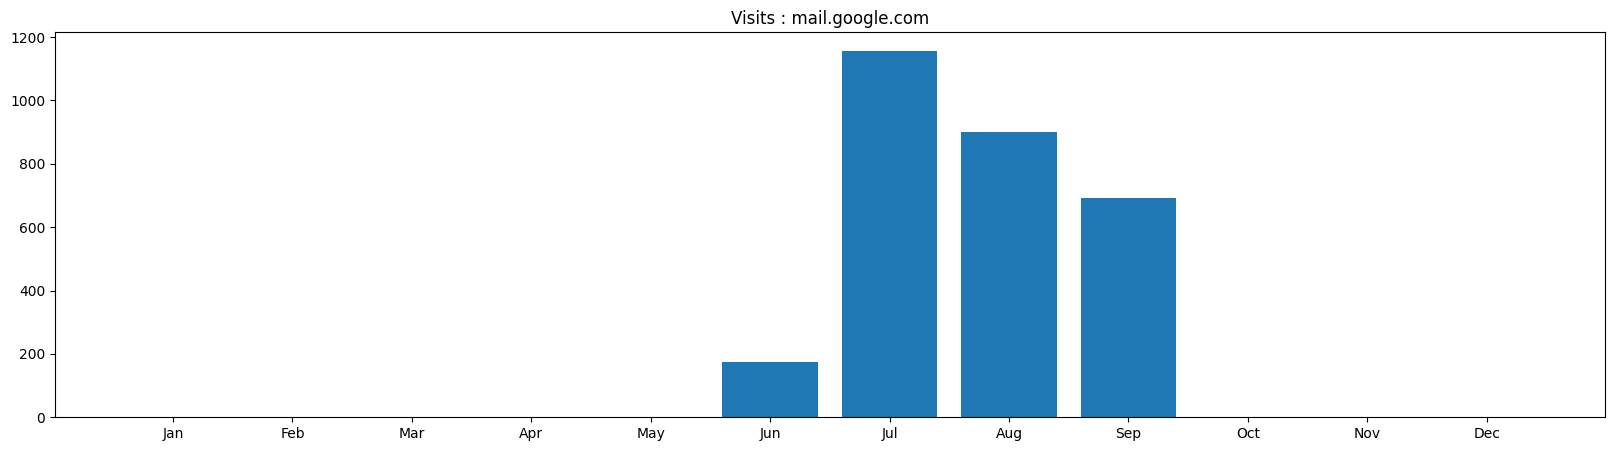

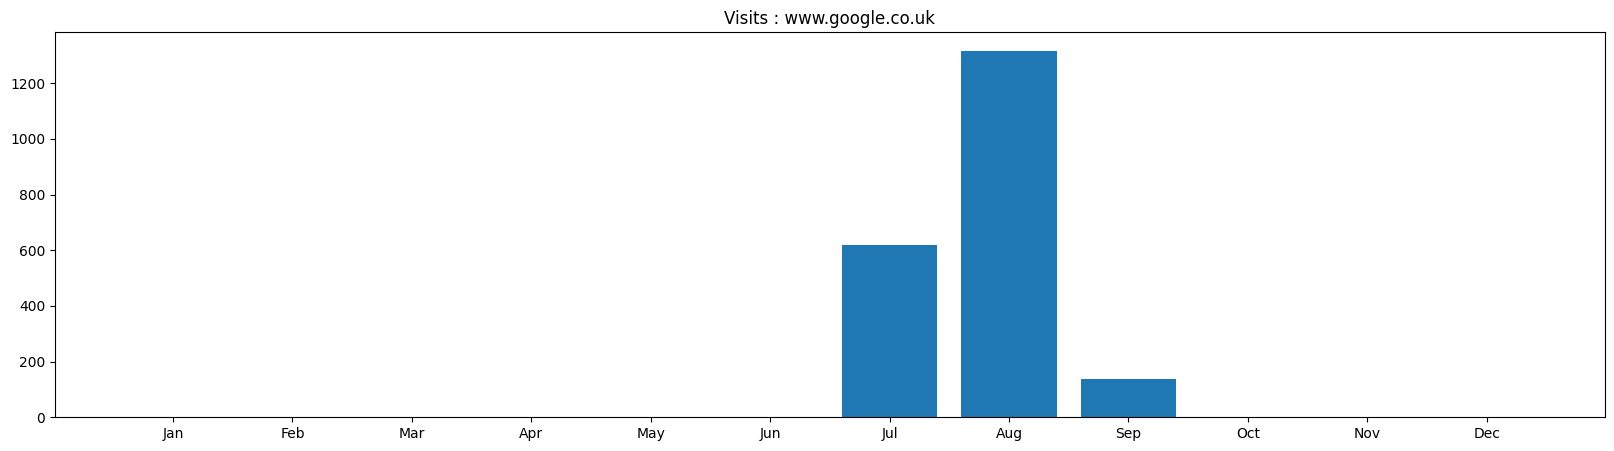

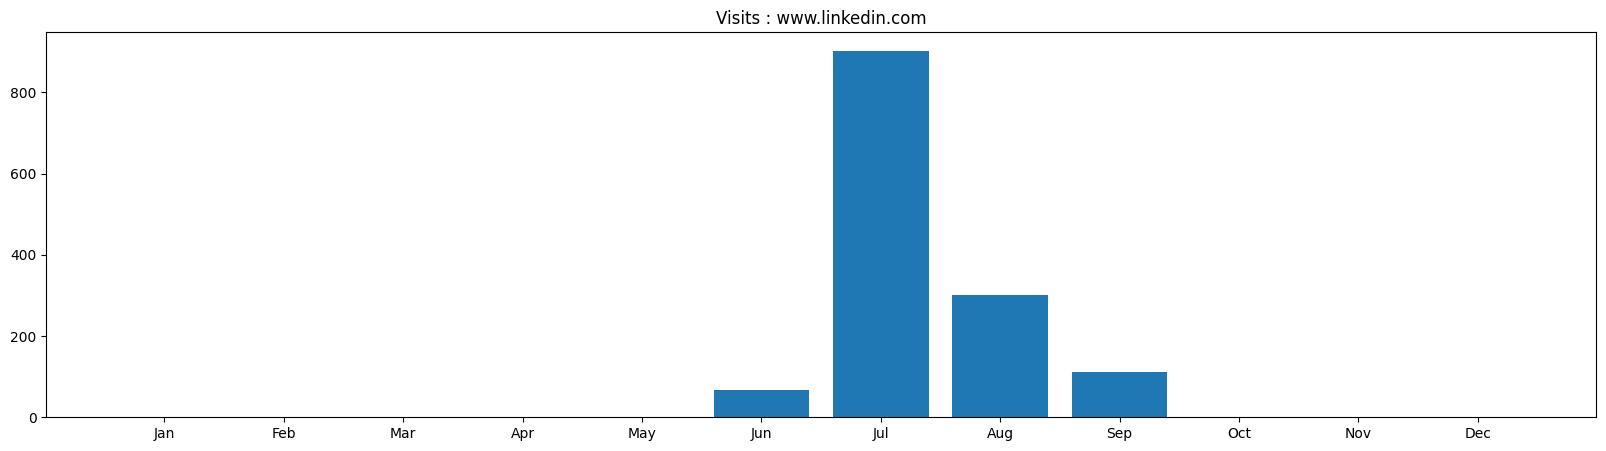

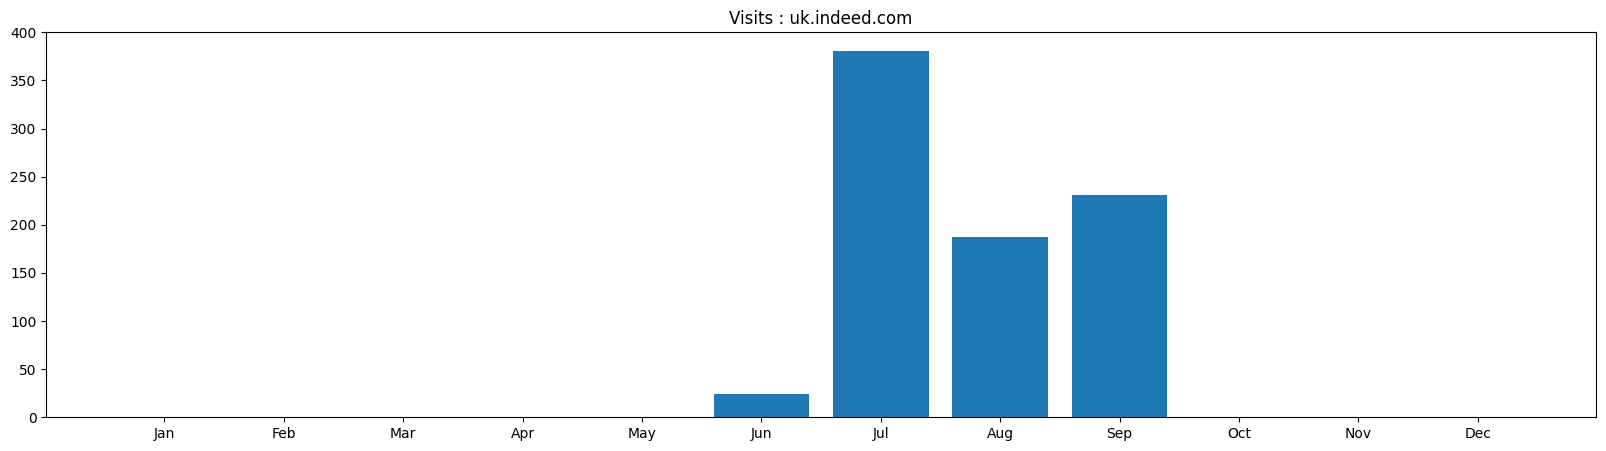

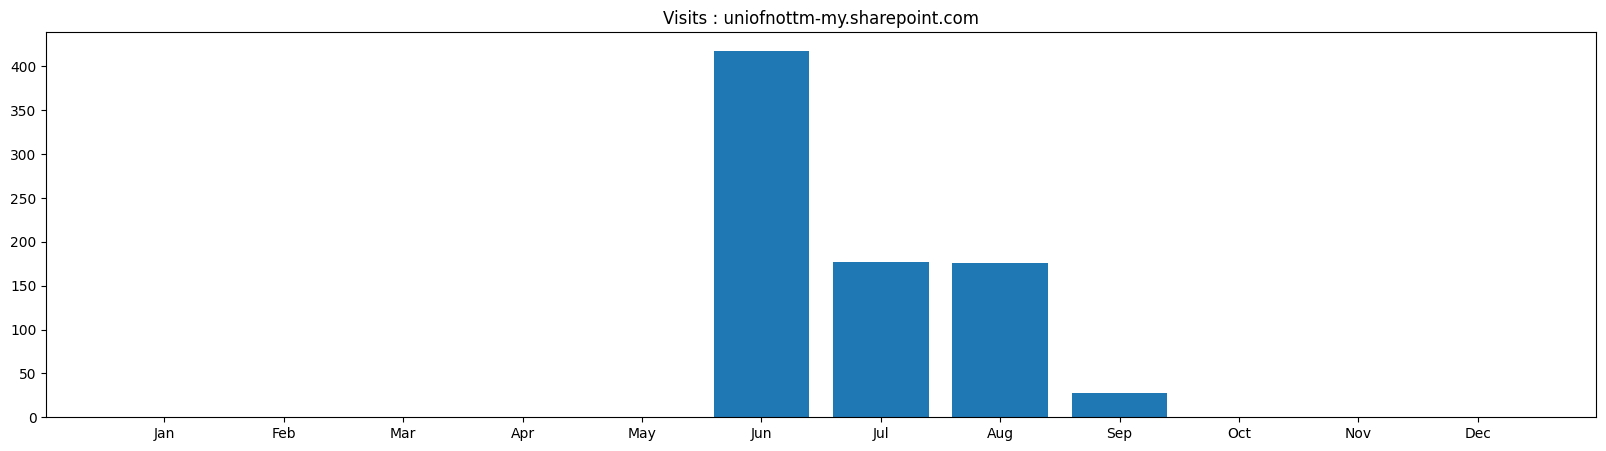

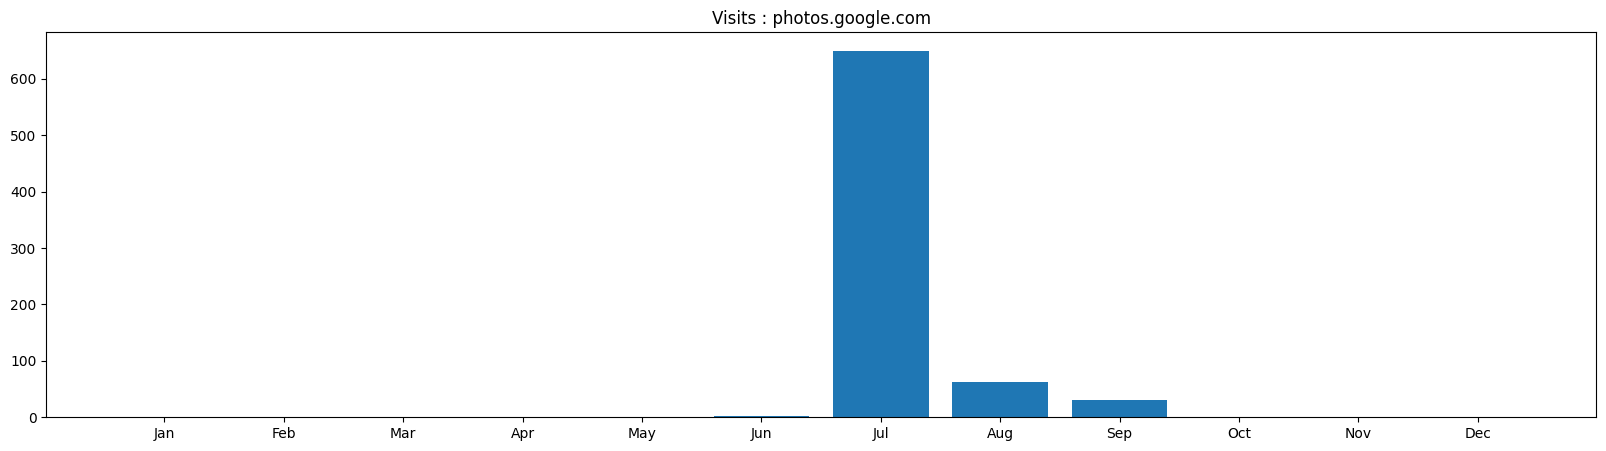

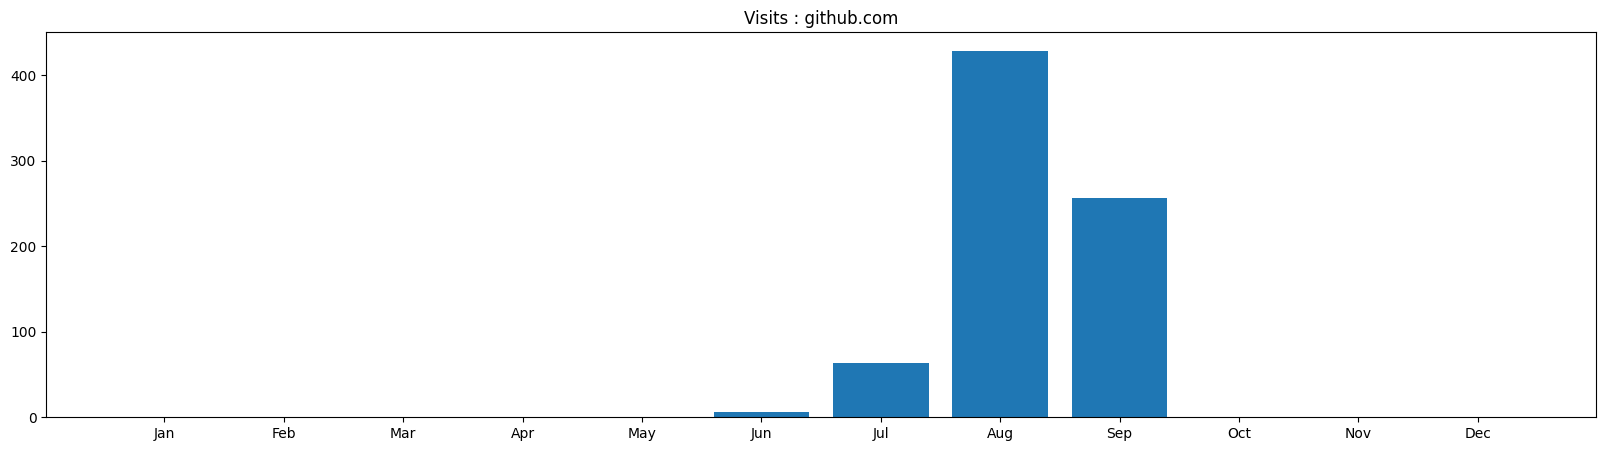

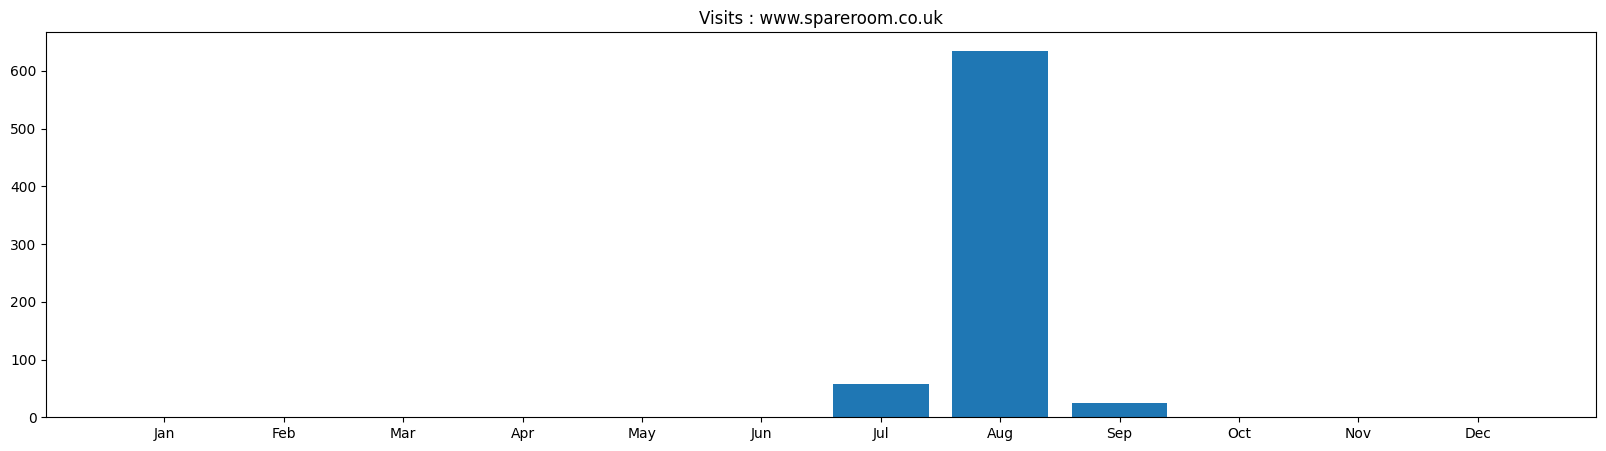

In [13]:
for i in range(0,len(sites1_datewise)):
    ne=sites1_datewise[i][1:len(sites1_datewise[i])-1]
    ypoints = np.array(ne)
    plt.bar(monthsarr_str,ypoints)
    plt.rcParams["figure.figsize"] = (20,5)
    plt.title('Visits : '+sites1_datewise[i][0])
    plt.show()

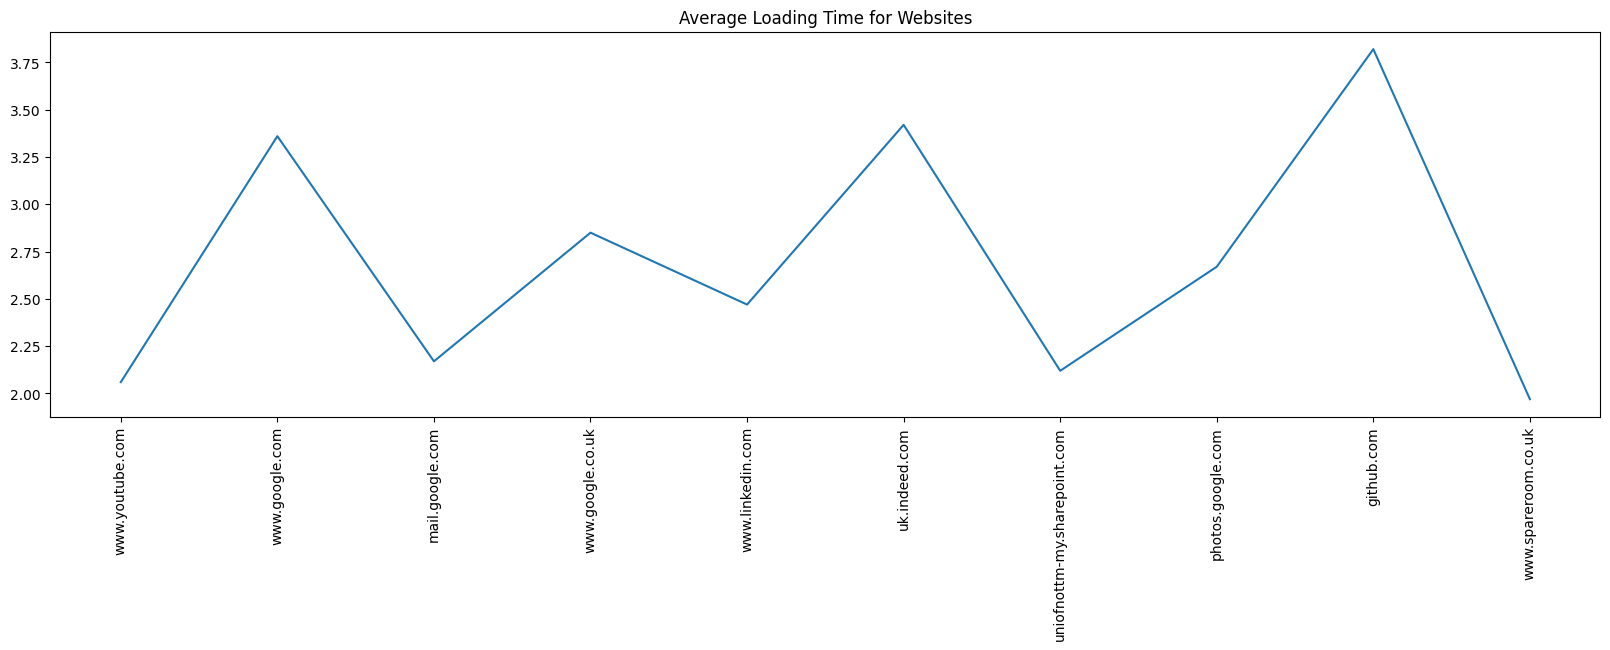

In [14]:
ypoints = np.array(ne)
plt.plot(time1_site,time1)
plt.xticks(rotation='vertical')
plt.title('Average Loading Time for Websites')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [15]:
userbehaviours=[]
for i in range(0,usercount):
    userbehaviours.append([])
print(len(userbehaviours))
for i in range(0,usercount):
    for j in range(0,len(fullhistory)):
        if fullhistory[j][3]==i+1:
            userbehaviours[i].append(fullhistory[j])    

7


In [16]:
userbehaviours1=[]
for i in range(0,usercount):
    u=[]
    for j in range(0,len(mv_site1)):
        u.append([mv_site1[j],0])
    userbehaviours1.append(u)
for i in range(0,usercount):
    for j in range(0,len(mv_site1)):
        for k in range(0,len(fullhistory)):
            if mv_site1[j] in fullhistory[k][0] and fullhistory[k][3]==i+1:
                userbehaviours1[i][j][1]=userbehaviours1[i][j][1]+1

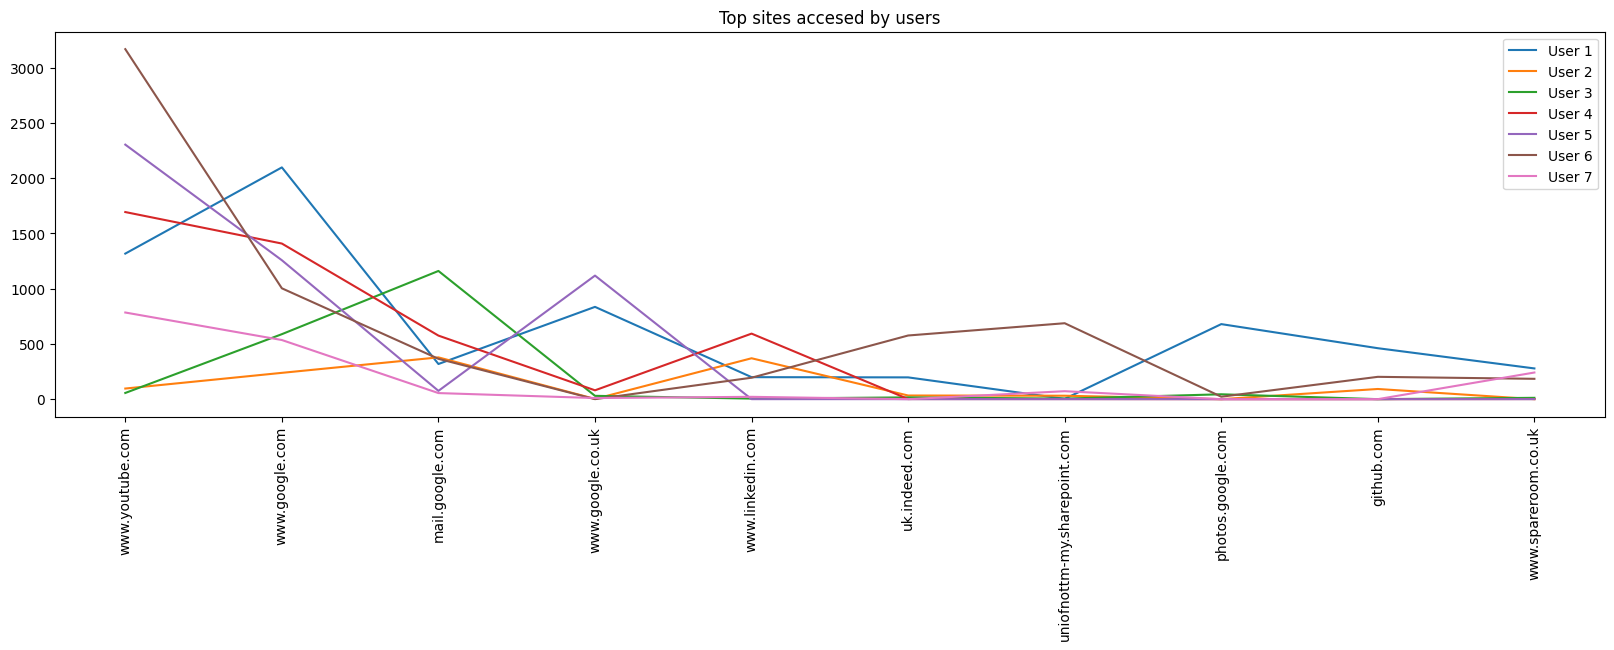

In [17]:
for i in range(0,usercount):
    g=[]
    for k in range(0,len(userbehaviours1[i])):
        g.append(userbehaviours1[i][k][1])
    ypoints = np.array(g)
    plt.plot(mv_site1,ypoints,label='User '+str(i+1))
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Top sites accesed by users')
plt.show()

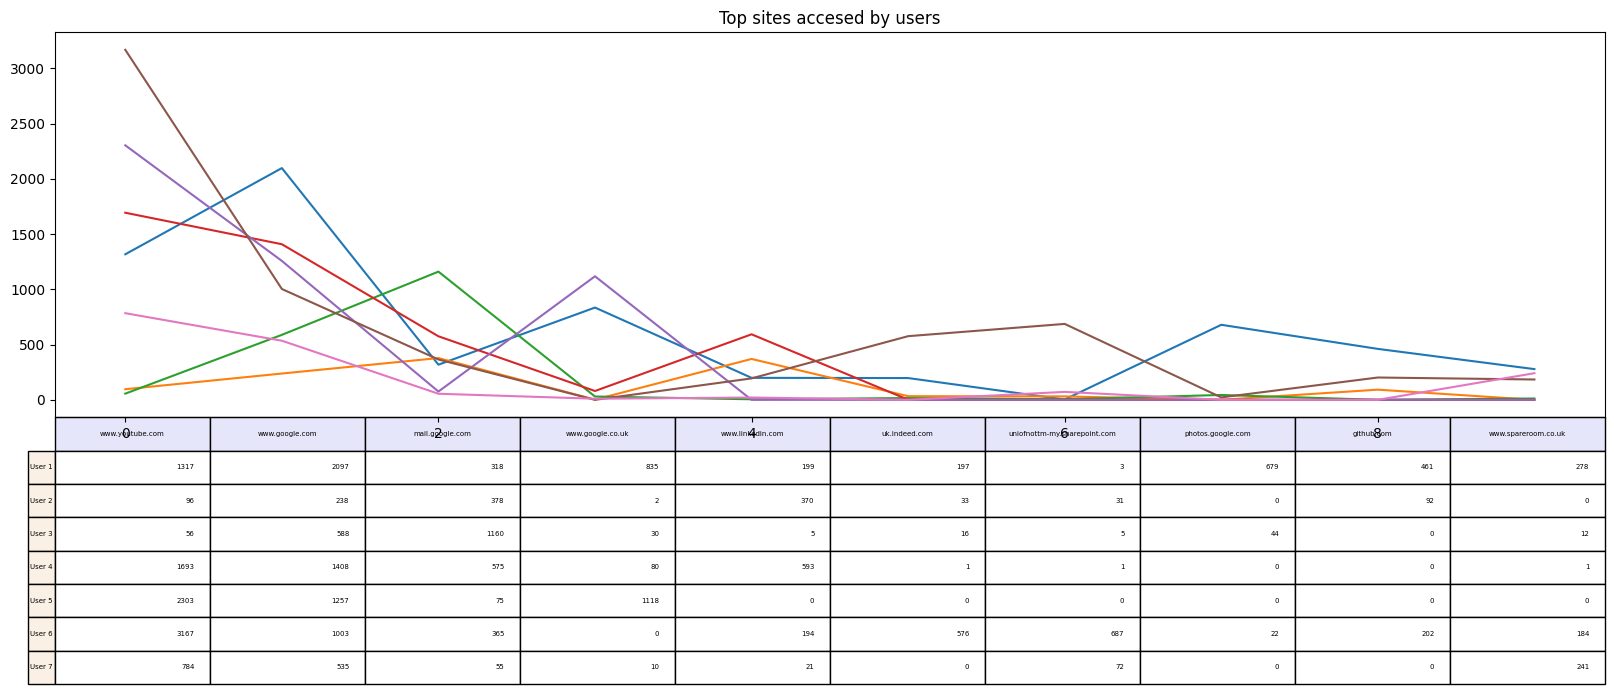

In [18]:
z=[]
rl=[]
for i in range(0,usercount):
    rl.append("User "+str(i+1))
    g=[]
    for k in range(0,len(userbehaviours1[i])):
        g.append(userbehaviours1[i][k][1])
    ypoints = np.array(g)
    plt.plot(ypoints,label='User '+str(i+1))
    z.append(g)
ypoints = np.array(z)
rcolors = np.full(len(rl), 'linen')
ccolors = np.full(len(mv_site1), 'lavender')
table=plt.table(rowLabels=rl,colLabels=mv_site1,cellText=ypoints,rowColours=rcolors,colColours=ccolors)
table.scale(1, 2)
table.set_fontsize(30)
plt.title('Top sites accesed by users')
plt.rcParams["figure.figsize"] = (20,2)
plt.show()

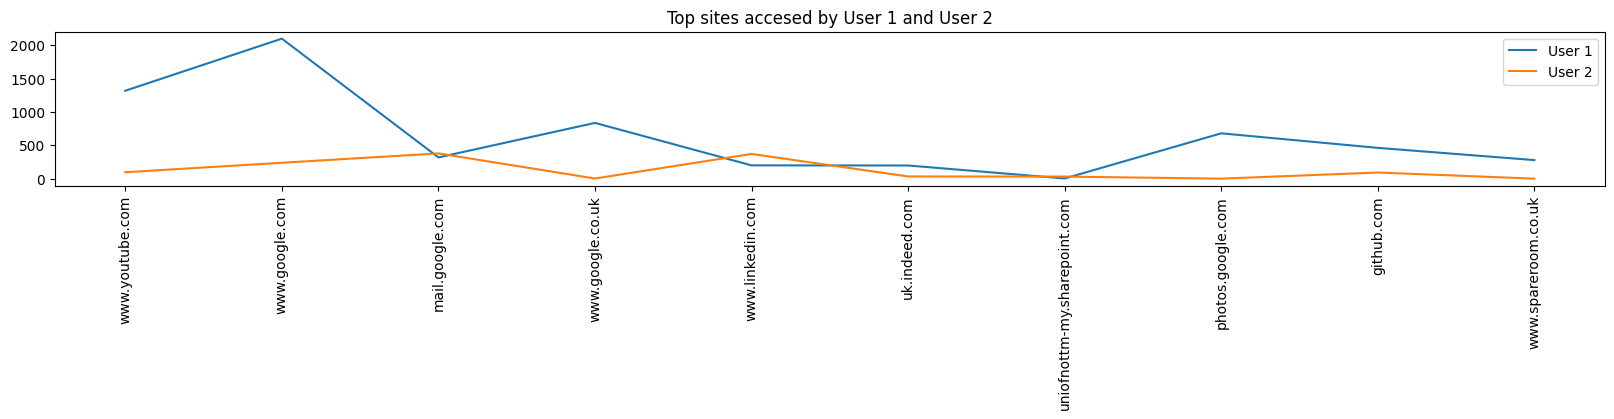

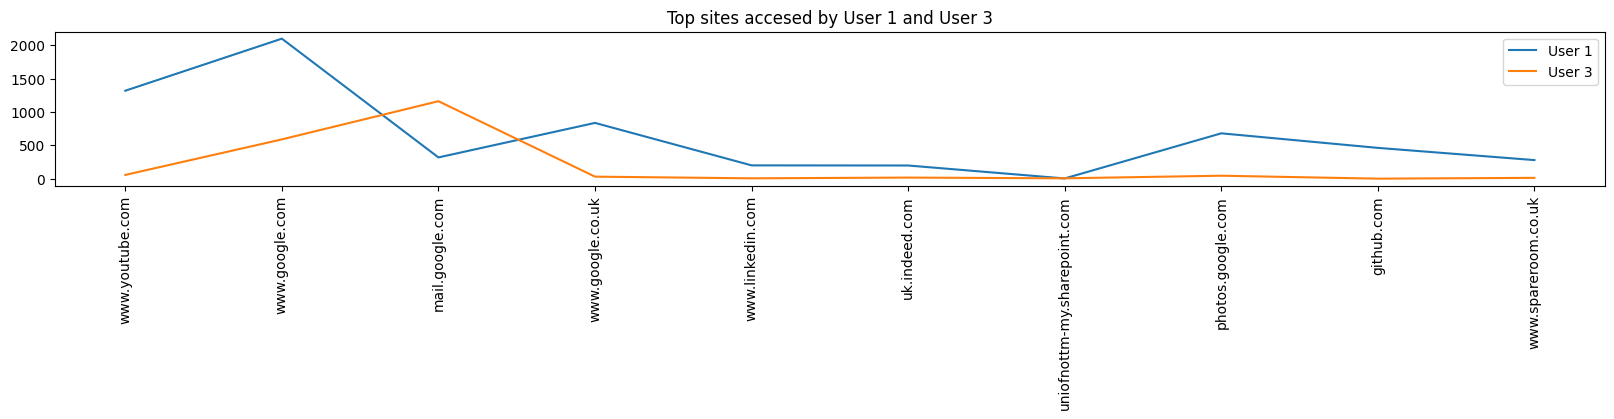

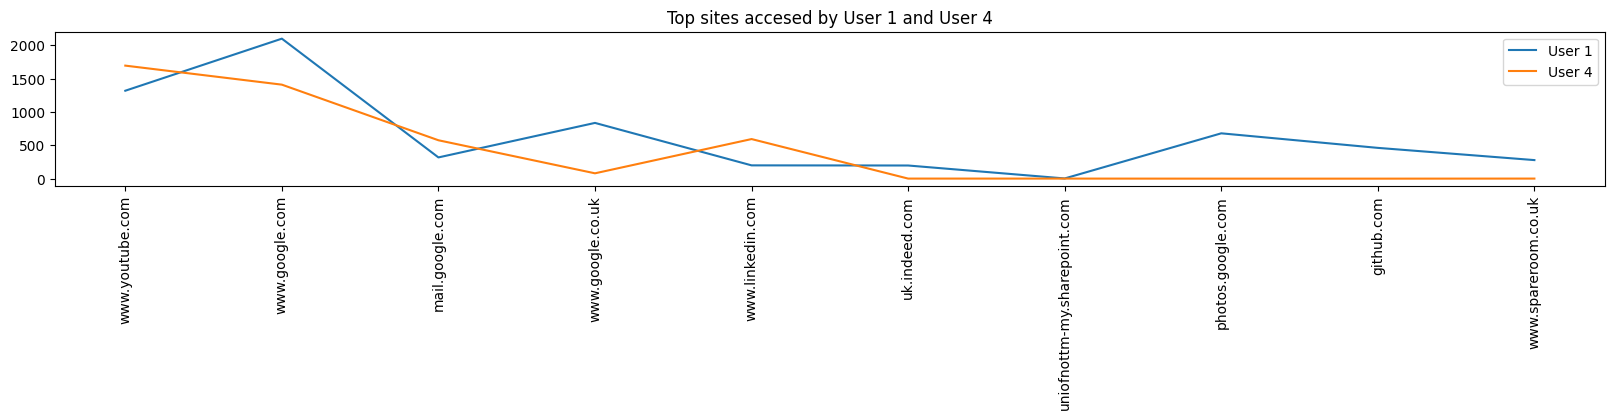

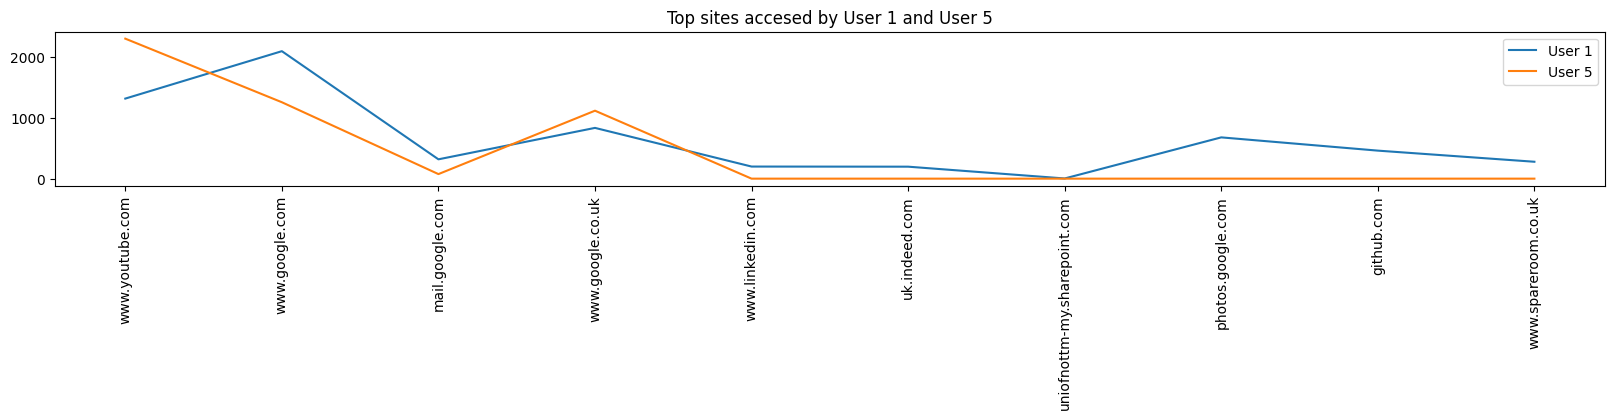

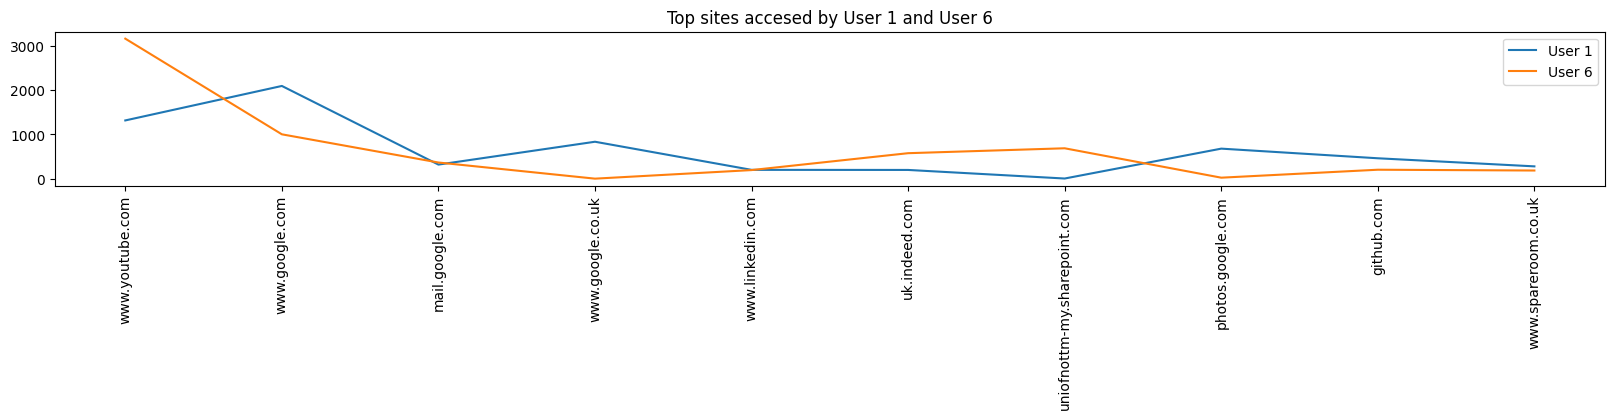

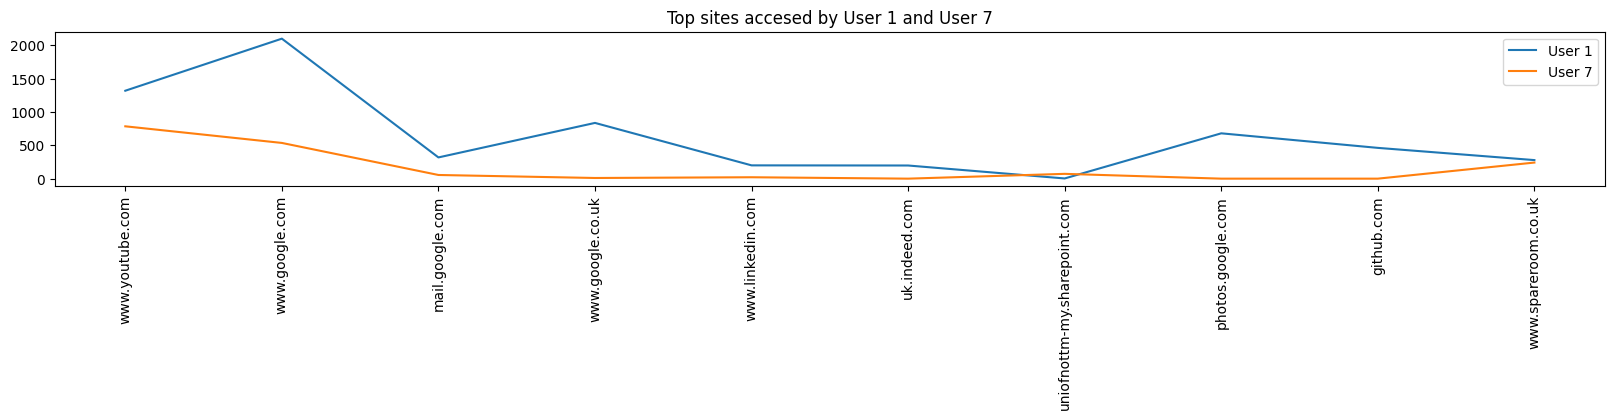

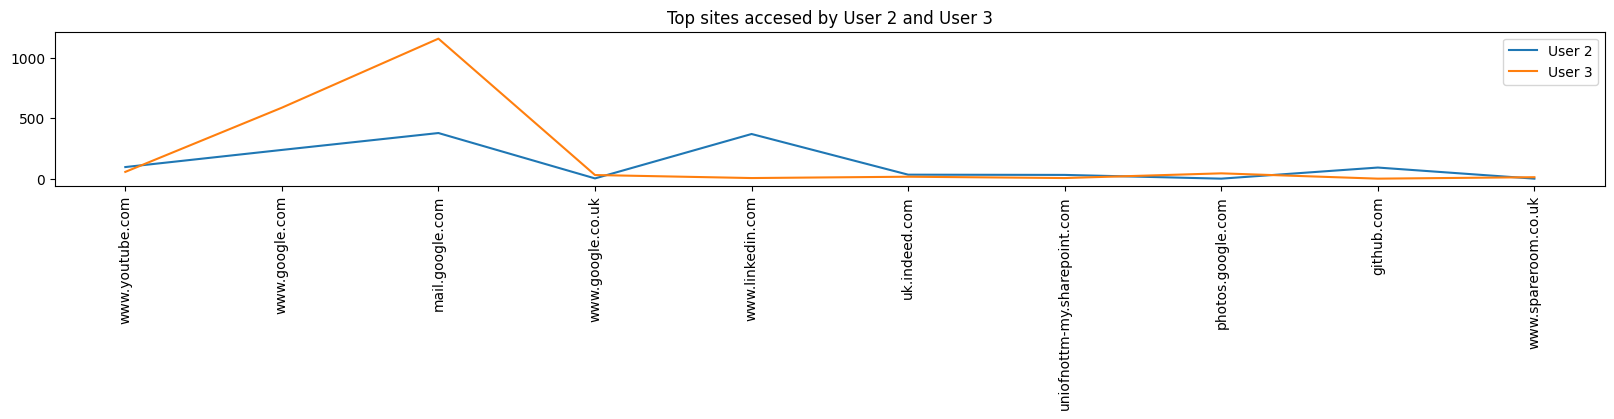

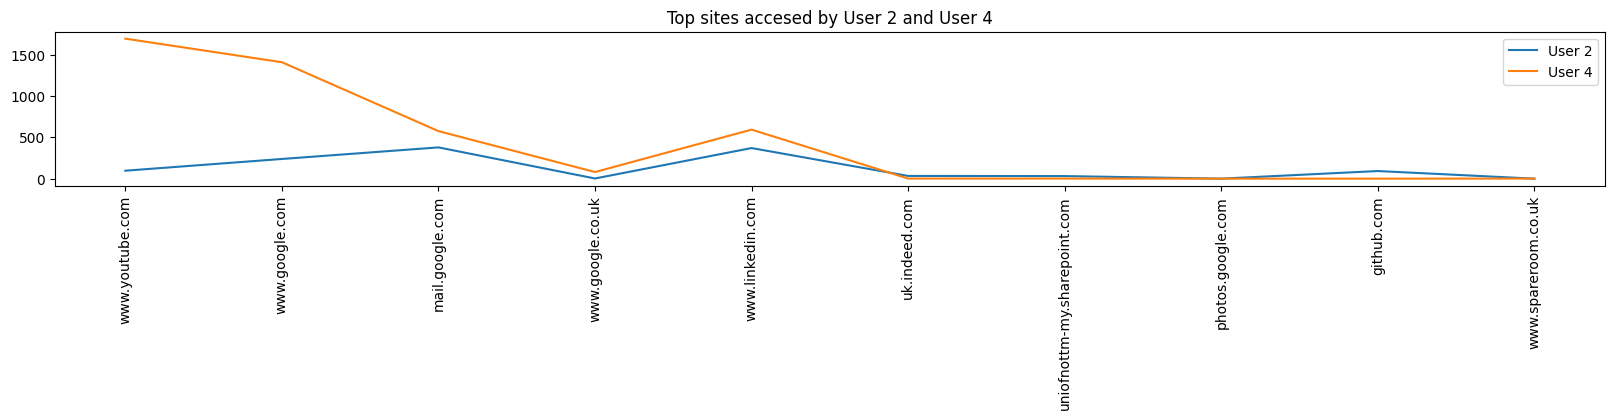

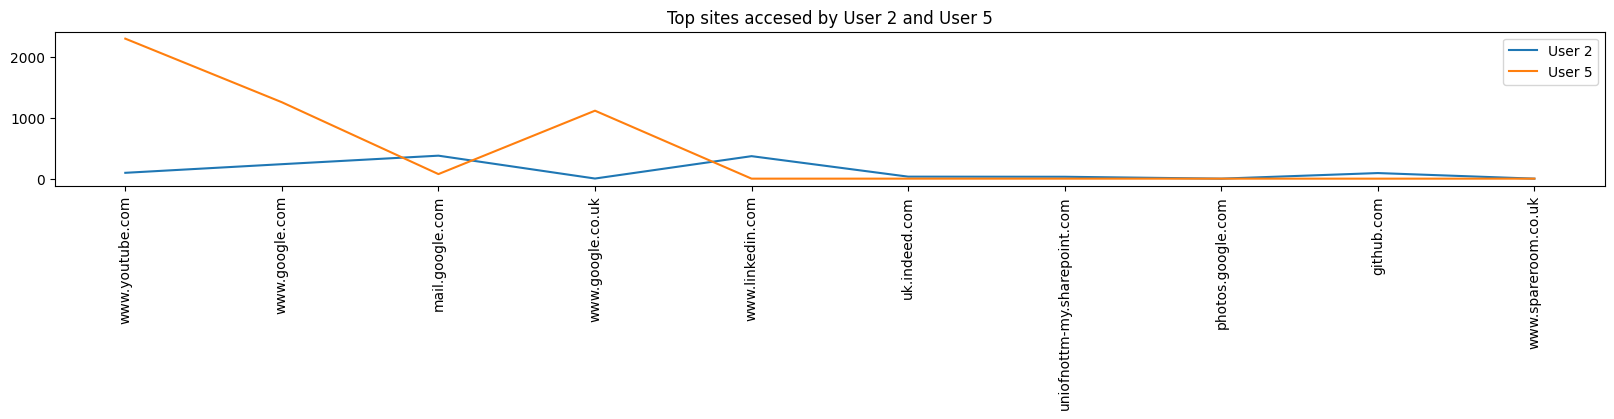

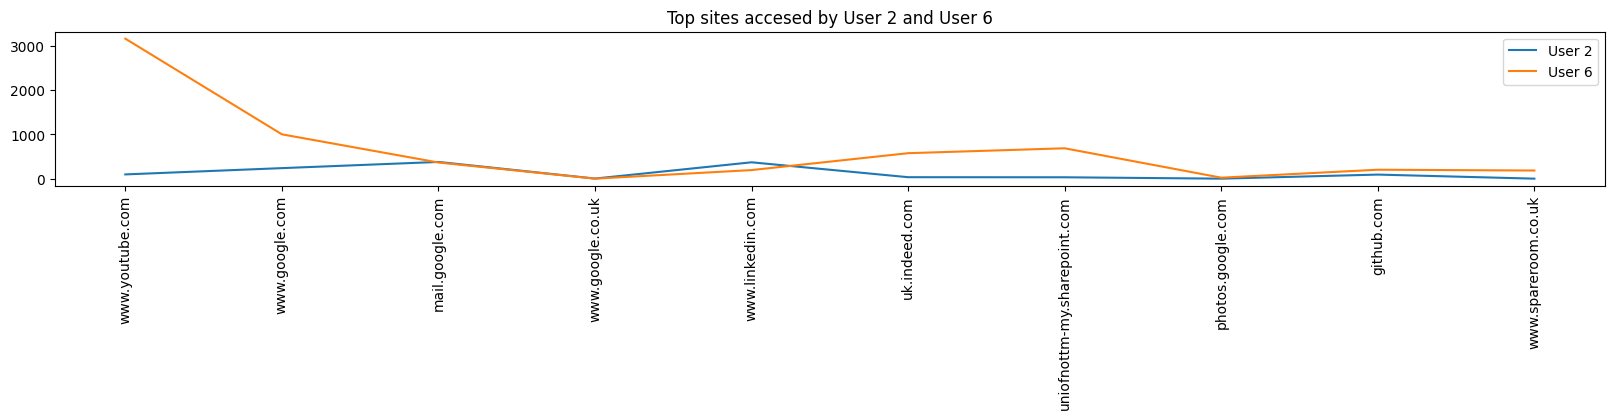

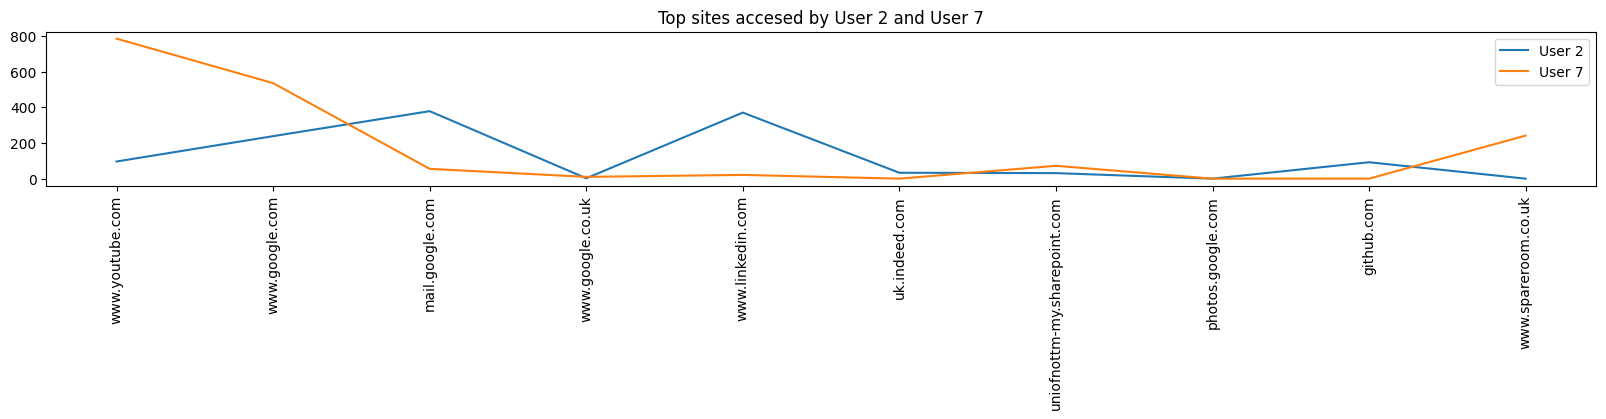

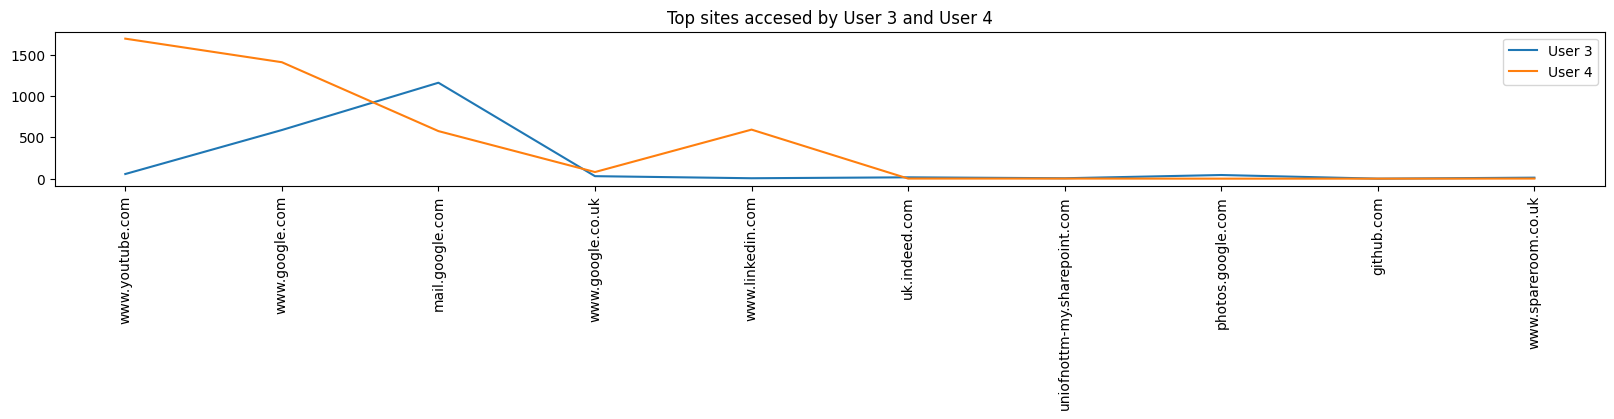

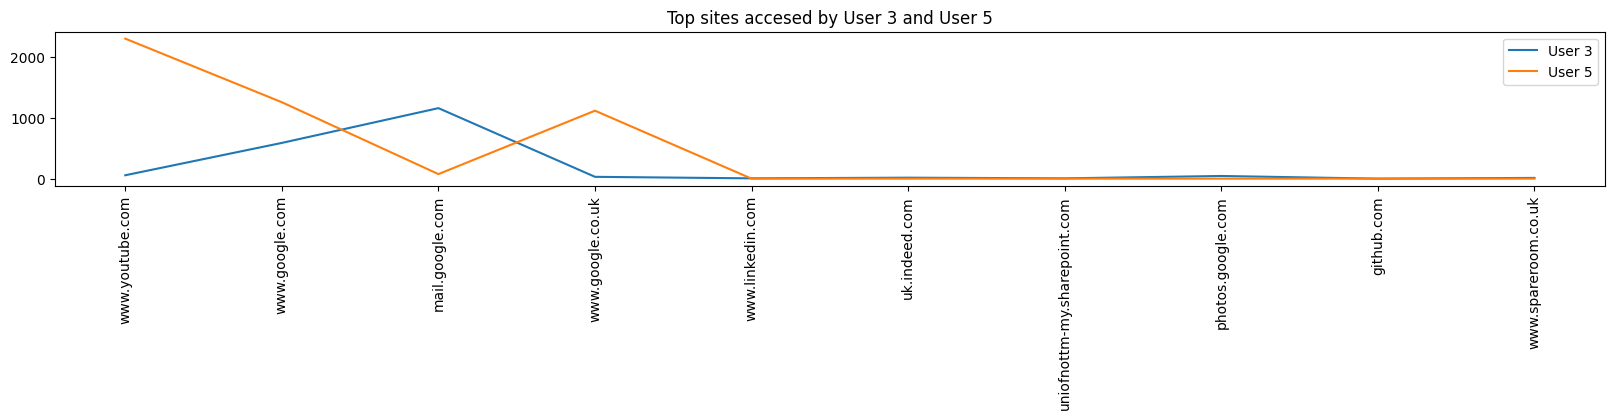

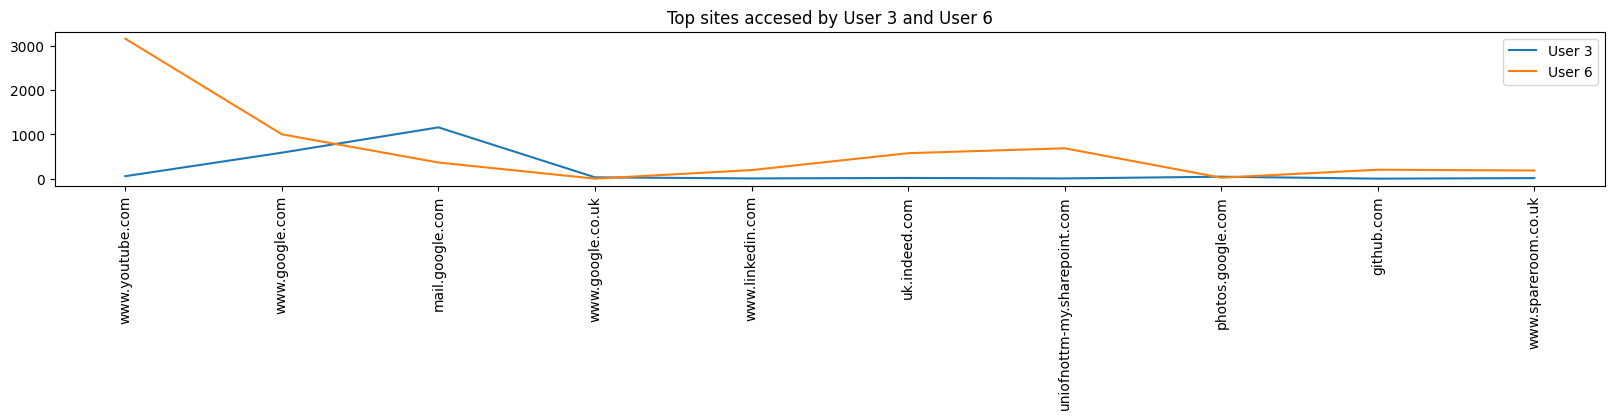

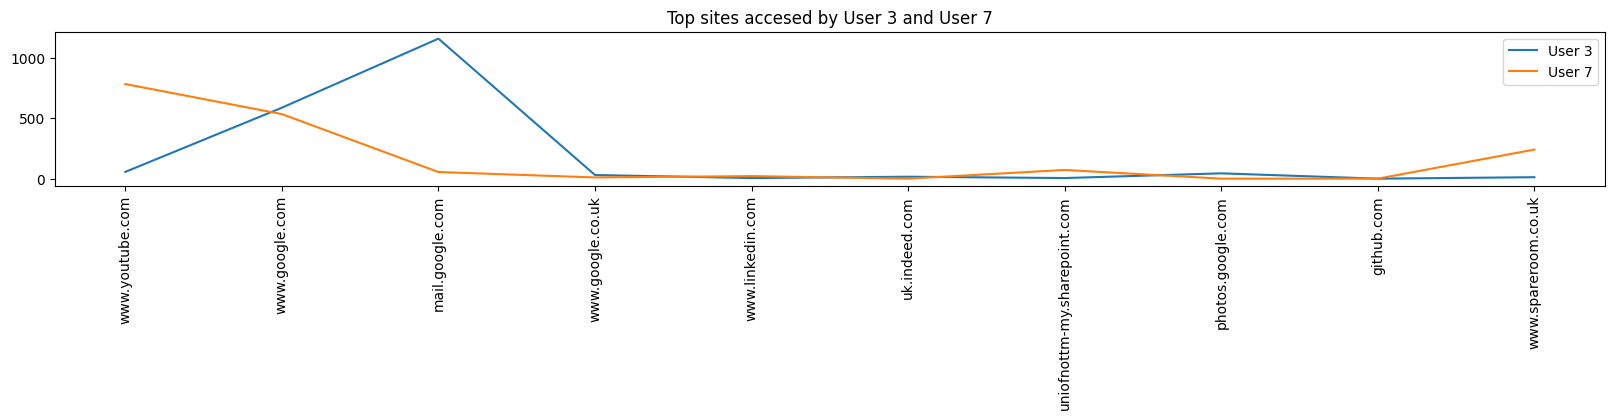

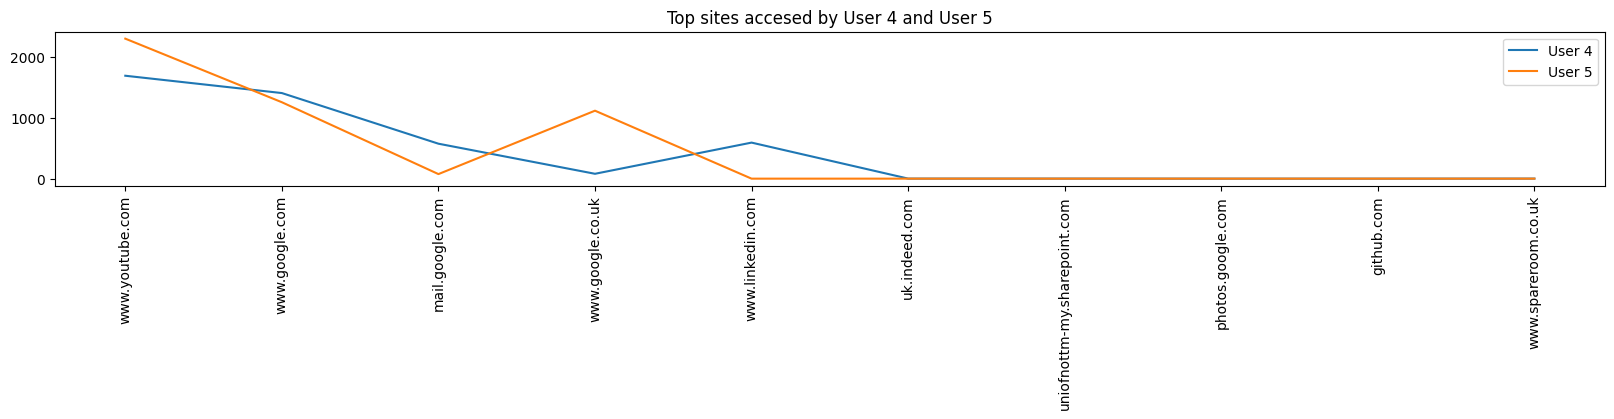

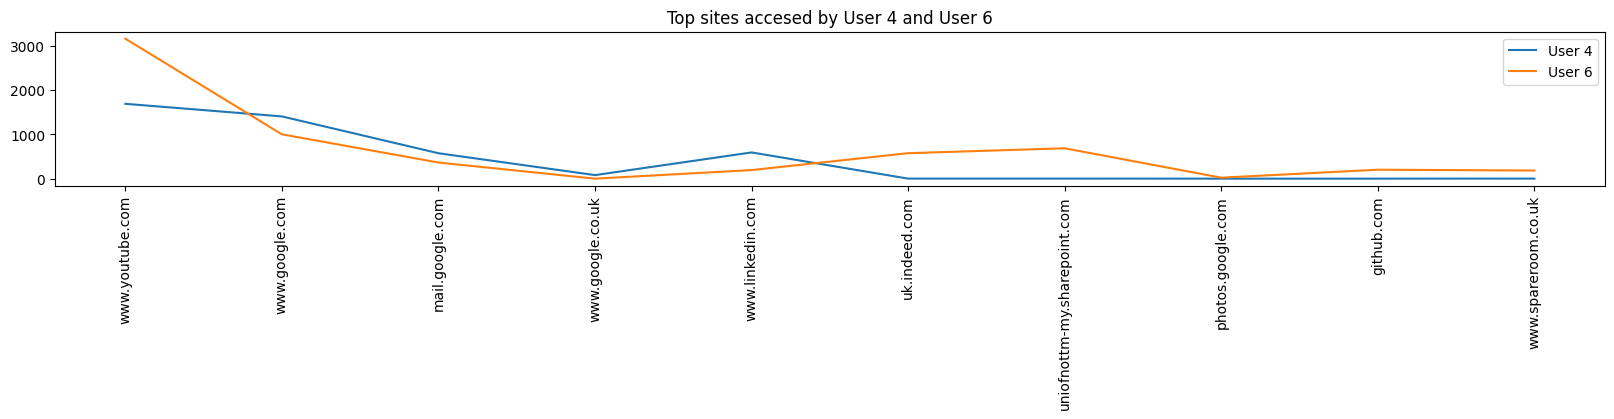

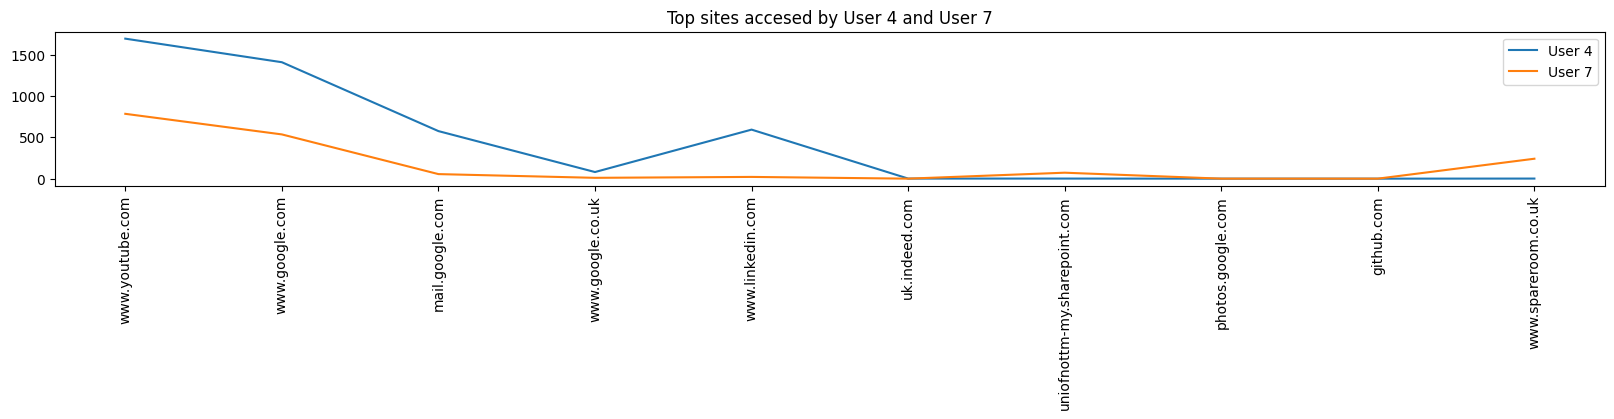

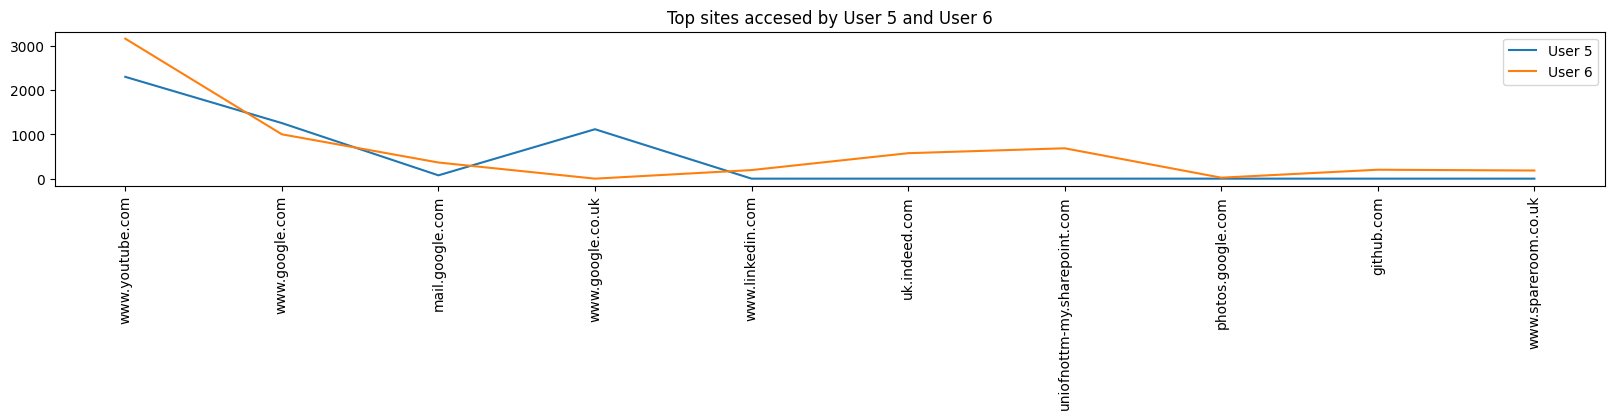

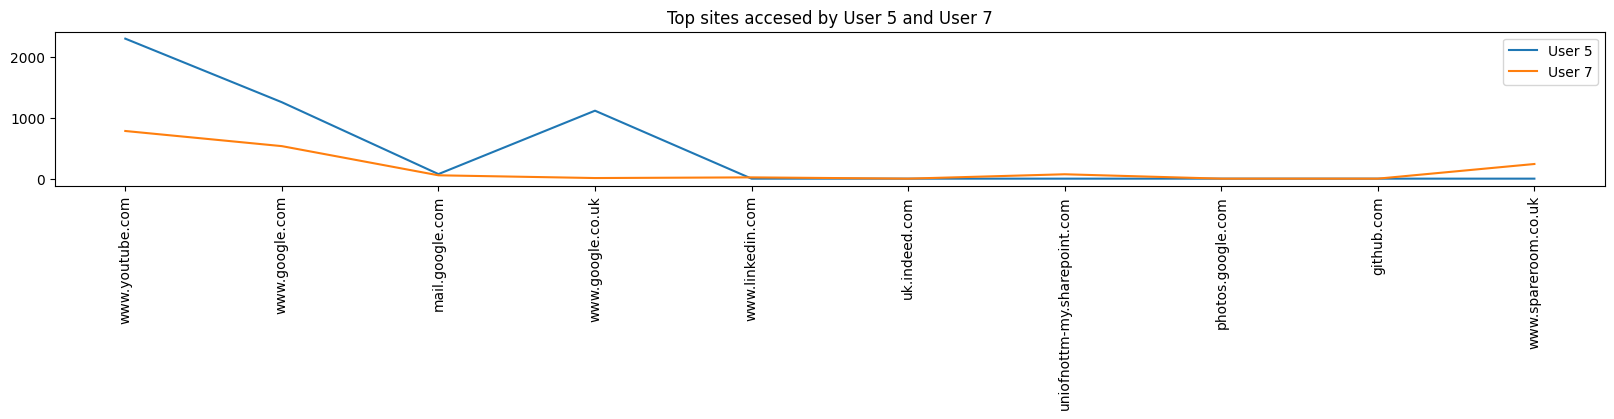

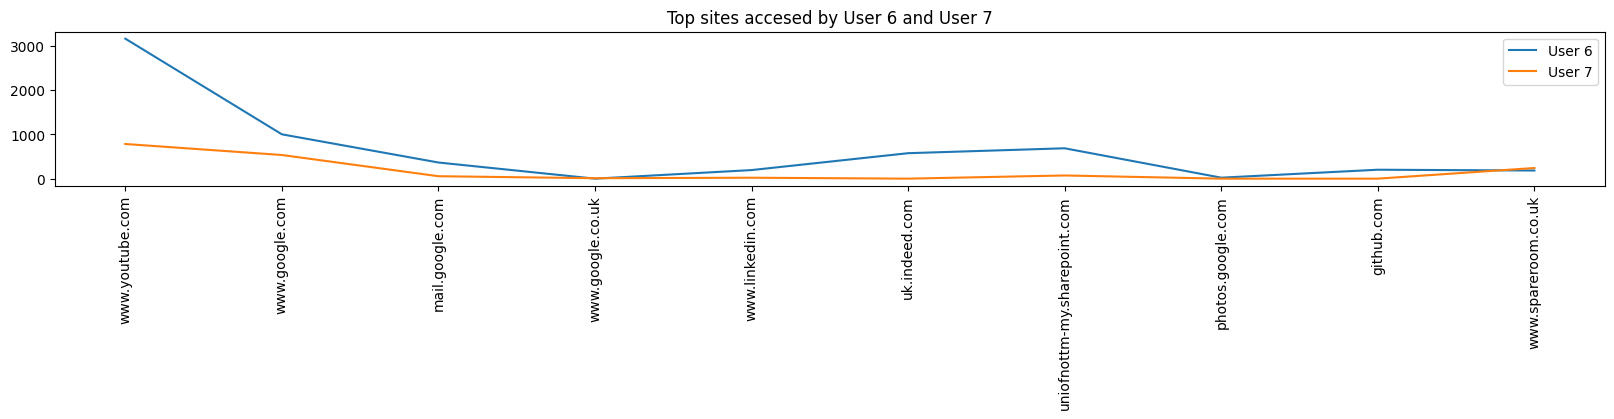

In [19]:
for i in range(0,usercount-1):
    for j in range(i+1,usercount):
        g=[]
        for k in range(0,len(userbehaviours1[i])):
            g.append(userbehaviours1[i][k][1])
        ypoints = np.array(g)
        plt.plot(mv_site1,ypoints,label='User '+str(i+1))
        g=[]
        for k in range(0,len(userbehaviours1[i])):
            g.append(userbehaviours1[j][k][1])
        ypoints = np.array(g)
        plt.plot(mv_site1,ypoints,label='User '+str(j+1))
        plt.xticks(rotation='vertical')
        plt.legend()
        plt.title('Top sites accesed by User '+str(i+1)+" and User "+str(j+1))
        plt.show()